# **PROYECTO FINAL SQL** - Albert Llobet y Arnau Martínez

# Importación de librerías y datos

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import plotly.express as px


In [85]:
# Cargar los datos 
homicide_rate = pd.read_csv(r'C:\Users\User\Desktop\CODING\FINAL PROJECT DATA ANALYST\homicide_rate_unodc.csv')
suicide_rate = pd.read_csv(r'C:\Users\User\Desktop\CODING\FINAL PROJECT DATA ANALYST\death_rate_from_suicides_gho.csv')
life_expectancy = pd.read_csv(r'C:\Users\User\Desktop\CODING\FINAL PROJECT DATA ANALYST\life_expectancy.csv')
public_healthcare = pd.read_csv(r'C:\Users\User\Desktop\CODING\FINAL PROJECT DATA ANALYST\public_healthcare_spending_share_gdp.csv')
gdp_per_capita = pd.read_csv(r'C:\Users\User\Desktop\CODING\FINAL PROJECT DATA ANALYST\gdp_per_capita_penn_world_table.csv')
poverty_explorer = pd.read_csv(r'C:\Users\User\Desktop\CODING\FINAL PROJECT DATA ANALYST\poverty_explorer.csv')
annual_number_deaths = pd.read_csv(r'C:\Users\User\Desktop\CODING\FINAL PROJECT DATA ANALYST\annual_number_of_deaths_by_cause.csv')
global_vaccionation_coverage = pd.read_csv(r'C:\Users\User\Desktop\CODING\FINAL PROJECT DATA ANALYST\global_vaccination_coverage.csv')
regions_x_country = pd.read_excel('C:/Users/User/Desktop/CODING/FINAL PROJECT DATA ANALYST/regions_x_country.xlsx')



In [86]:
#Filtrar los datos a partir de 1990

homicide_rate = homicide_rate[homicide_rate['Year'] >= 1990]
suicide_rate = suicide_rate[suicide_rate['Year'] >= 1990]
life_expectancy = life_expectancy[life_expectancy['Year'] >= 1990]
public_healthcare = public_healthcare[public_healthcare['Year'] >= 1990]
gdp_per_capita = gdp_per_capita[gdp_per_capita['Year'] >= 1990]
poverty_explorer = poverty_explorer[poverty_explorer['Year'] >= 1990]

global_vaccionation_coverage = global_vaccionation_coverage[global_vaccionation_coverage['Year'] >= 1990]

In [87]:
annual_number_deaths = annual_number_deaths[annual_number_deaths['Year'] >= 1990]

In [88]:
print(homicide_rate.columns)
print(suicide_rate.columns)
print(life_expectancy.columns)
print(public_healthcare.columns)
print(gdp_per_capita.columns)
print(poverty_explorer.columns)
print(annual_number_deaths.columns)
print(global_vaccionation_coverage.columns)

Index(['Entity', 'Code', 'Year',
       'Homicide rate per 100,000 population - Both sexes - All ages'],
      dtype='object')
Index(['Entity', 'Code', 'Year',
       'Age-standardized suicide rate - Sex: both sexes'],
      dtype='object')
Index(['Entity', 'Code', 'Year',
       'Period life expectancy at birth - Sex: all - Age: 0'],
      dtype='object')
Index(['Entity', 'Code', 'Year',
       'Domestic general government health expenditure (% of GDP)'],
      dtype='object')
Index(['Entity', 'Code', 'Year',
       'GDP per capita (output, multiple price benchmarks)'],
      dtype='object')
Index(['Entity', 'Year', 'Share below $1 a day', 'Share below $2.15 a day',
       'Share below $3.65 a day', 'Share below $6.85 a day',
       'Share below $10 a day', 'Share below $20 a day',
       'Share below $30 a day', 'Share below $40 a day',
       ...
       'decile8_avg', 'decile9_avg', 'decile10_avg', 'bottom50_share',
       'middle40_share', 'palma_ratio', 's80_s20_ratio', 'p90_p10_r

In [89]:
# Lista de países a eliminar
countries_to_remove = [
    'High-income countries',
    'Land-locked Developing Countries (LLDC)',
    'Least developed countries',
    'Less developed regions',
    'Less developed regions, excluding China',
    'Less developed regions, excluding least developed countries',
    'Low-income countries',
    'Lower-middle-income countries',
    'Middle-income countries',
    'More developed regions',
    'No income group available',
    'Small Island Developing States (SIDS)',
    'Upper-middle-income countries',
    'African Region (WHO)',
    'East Asia & Pacific (WB)',
    'World',
    'Eastern Mediterranean Region (WHO)',
    'Europe & Central Asia (WB)',
    'European Region (WHO)',
    'G20',
    'Latin America & Caribbean (WB)',
    'Middle East & North Africa (WB)',
    'North America (WB)',
    'OECD Countries',
    'Region of the Americas (WHO)',
    'South Asia (WB)',
    'South-East Asia Region (WHO)',
    'Sub-Saharan Africa (WB)',
    'Western Pacific Region (WHO)',
    'World Bank High Income', 
    'World Bank Low Income',
    'World Bank Lower Middle Income', 
    'World Bank Upper Middle Income',
    'Western Pacific Region (WHO)',
    'World Bank High Income'
]

# Filtrar el dataframe para eliminar los países de la lista
homicide_rate = homicide_rate[~homicide_rate['Entity'].isin(countries_to_remove)]
suicide_rate = suicide_rate[~suicide_rate['Entity'].isin(countries_to_remove)]
public_healthcare = public_healthcare[~public_healthcare['Entity'].isin(countries_to_remove)]
gdp_per_capita = gdp_per_capita[~gdp_per_capita['Entity'].isin(countries_to_remove)]
poverty_explorer = poverty_explorer[~poverty_explorer['Entity'].isin(countries_to_remove)]
annual_number_deaths = annual_number_deaths[~annual_number_deaths['Entity'].isin(countries_to_remove)]
global_vaccionation_coverage = global_vaccionation_coverage[~global_vaccionation_coverage['Entity'].isin(countries_to_remove)]


# Mostrar las primeras filas del dataframe filtrado para verificar el resultado
homicide_rate.head()

Entity Code  Year  \
0  Afghanistan  AFG  2009   
1  Afghanistan  AFG  2010   
2  Afghanistan  AFG  2011   
3  Afghanistan  AFG  2012   
4  Afghanistan  AFG  2015   

   Homicide rate per 100,000 population - Both sexes - All ages  
0                                           4.071527             
1                                           3.487093             
2                                           4.208668             
3                                           6.393913             
4                                           9.975262

# Exploración inicial de datos

## **Análisis de correlación**: Distribución de la Esperanza de Vida por País y Año

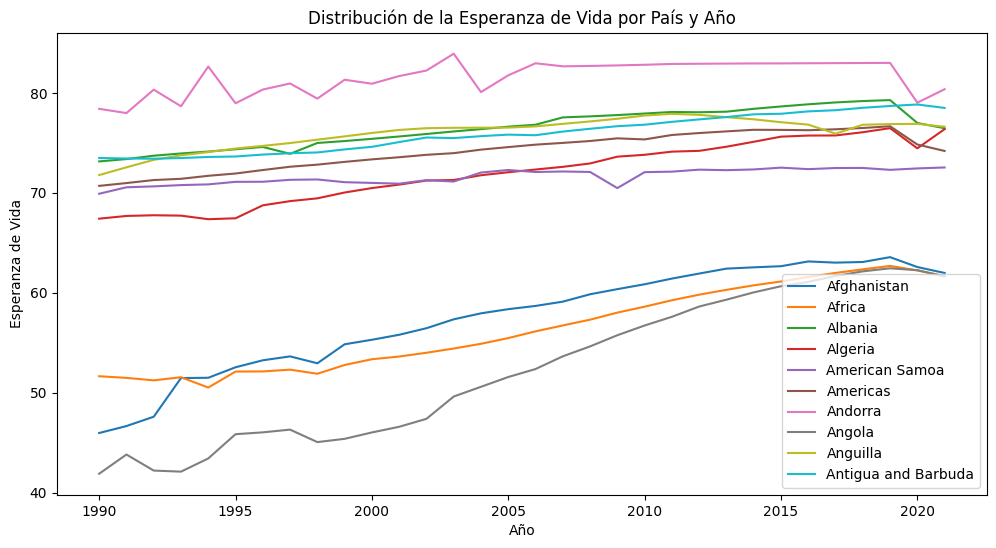

In [90]:
# Convertir la columna de esperanza de vida a numérico
life_expectancy['Period life expectancy at birth - Sex: all - Age: 0'] = pd.to_numeric(
    life_expectancy['Period life expectancy at birth - Sex: all - Age: 0'], errors='coerce'
)

# Distribución de la esperanza de vida por país y año
plt.figure(figsize=(12, 6))
for country in life_expectancy['Entity'].unique()[:10]:  # Limitado a los primeros 10 países para claridad
    subset = life_expectancy[life_expectancy['Entity'] == country]
    plt.plot(subset['Year'], subset['Period life expectancy at birth - Sex: all - Age: 0'], label=country)

plt.title('Distribución de la Esperanza de Vida por País y Año')
plt.xlabel('Año')
plt.ylabel('Esperanza de Vida')
plt.legend()
plt.show()


## **Análisis de correlación**: Tasa de Homicidios vs. Esperanza de Vida

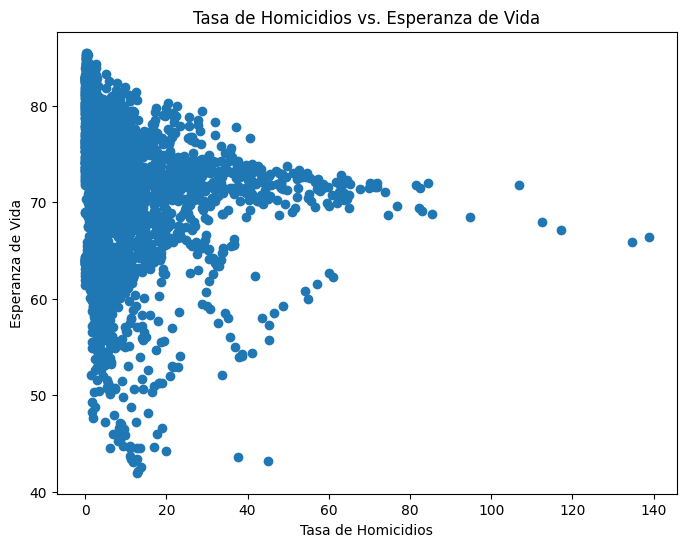

Homicide_Rate  \
Homicide_Rate                                            1.000000   
Period life expectancy at birth - Sex: all - Ag...      -0.239635   

                                                    Period life expectancy at birth - Sex: all - Age: 0  
Homicide_Rate                                                                               -0.239635    
Period life expectancy at birth - Sex: all - Ag...                                           1.000000

In [91]:
# Unir los datos de tasa de homicidios y esperanza de vida
merged_homicide_life_expectancy = pd.merge(
    life_expectancy, homicide_rate, left_on=['Entity', 'Year'], right_on=['Entity', 'Year'], how='inner'
)

# Renombrar la columna de homicidios para evitar confusión
merged_homicide_life_expectancy.rename(columns={'Homicide rate per 100,000 population - Both sexes - All ages': 'Homicide_Rate'}, inplace=True)

# Calcular la correlación
correlation_homicide_life = merged_homicide_life_expectancy[['Homicide_Rate', 'Period life expectancy at birth - Sex: all - Age: 0']].corr()

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(merged_homicide_life_expectancy['Homicide_Rate'], merged_homicide_life_expectancy['Period life expectancy at birth - Sex: all - Age: 0'])
plt.title('Tasa de Homicidios vs. Esperanza de Vida')
plt.xlabel('Tasa de Homicidios')
plt.ylabel('Esperanza de Vida')
plt.show()

correlation_homicide_life

## Análisis temporal de la esperanza de vida para varios países:


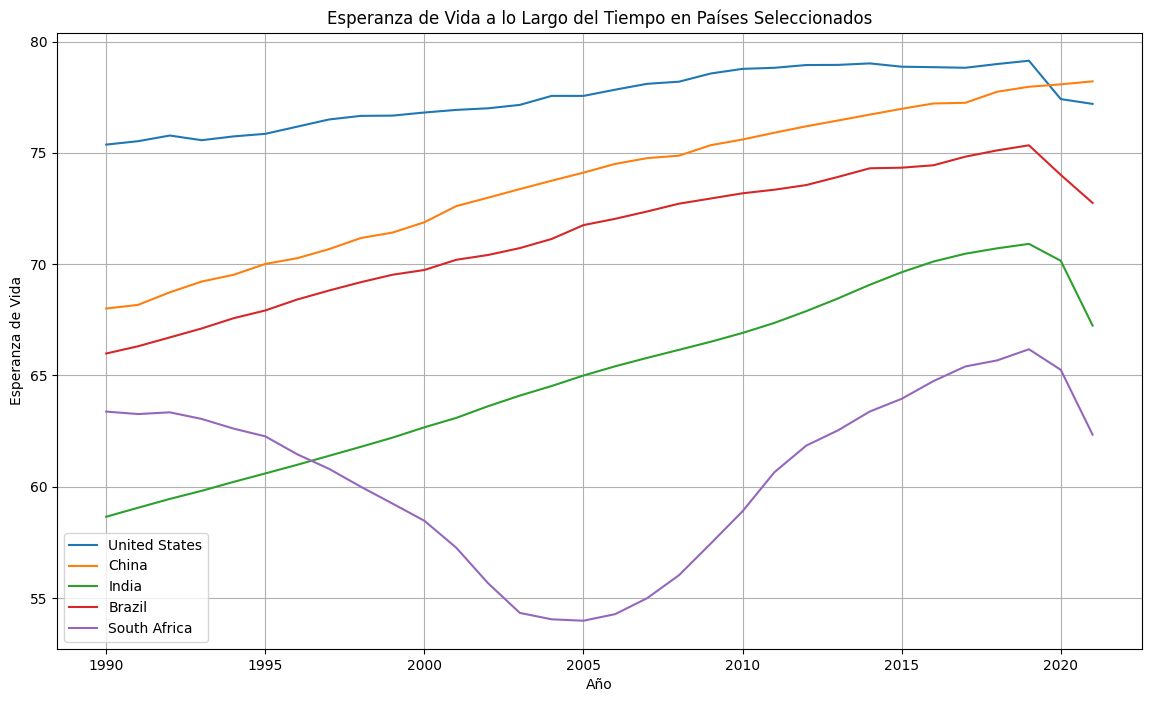

In [92]:
# Seleccionar algunos países para el análisis temporal
countries = ["United States", "China", "India", "Brazil", "South Africa"]

plt.figure(figsize=(14, 8))
for country in countries:
    country_data = life_expectancy[life_expectancy["Entity"] == country]
    plt.plot(country_data["Year"], country_data["Period life expectancy at birth - Sex: all - Age: 0"], label=country)

plt.title('Esperanza de Vida a lo Largo del Tiempo en Países Seleccionados')
plt.xlabel('Año')
plt.ylabel('Esperanza de Vida')
plt.legend()
plt.grid(True)
plt.savefig('life_expectancy_over_time.png')
plt.show()

## Análisis geográfico de la esperanza de vida (usando varios regiones y países de ejemplo):

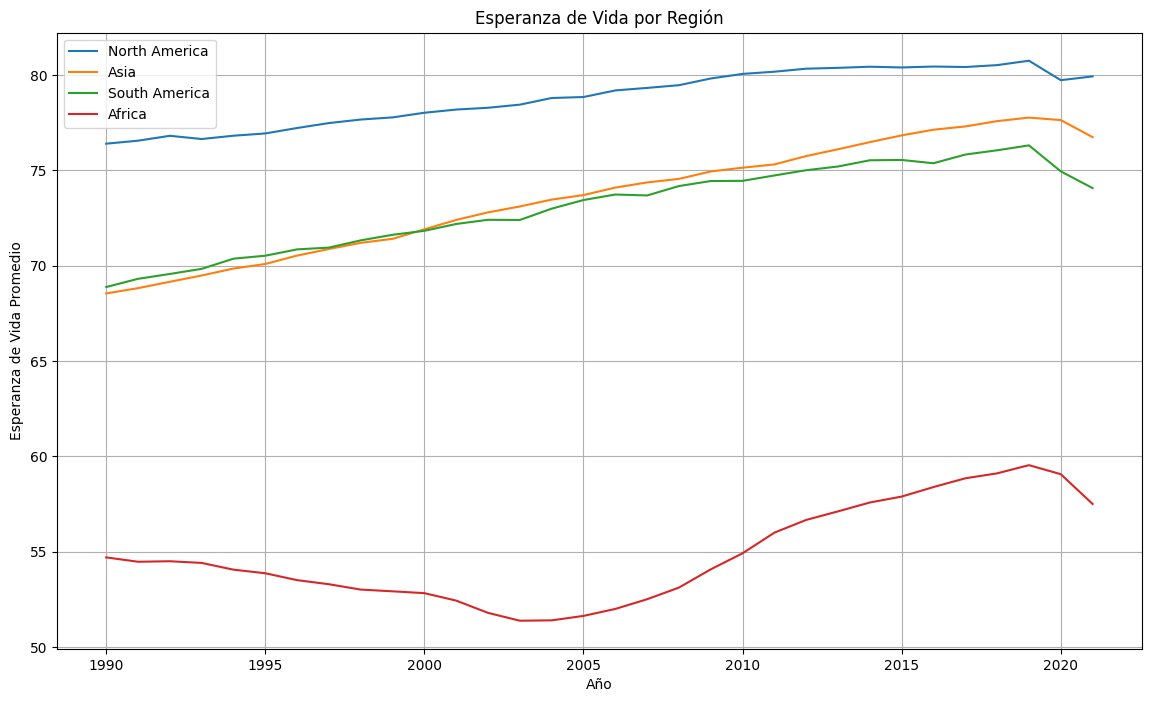

In [93]:
# Lista de regiones (esto es solo un ejemplo, necesitarías ajustar según tus datos)
regions = {
    "North America": ["United States", "Canada"],
    "Asia": ["China", "India", "Japan"],
    "South America": ["Brazil", "Argentina"],
    "Africa": ["South Africa", "Nigeria"]
}

plt.figure(figsize=(14, 8))
for region, countries in regions.items():
    region_data = life_expectancy[life_expectancy["Entity"].isin(countries)]
    region_avg = region_data.groupby("Year")["Period life expectancy at birth - Sex: all - Age: 0"].mean()
    plt.plot(region_avg.index, region_avg.values, label=region)

plt.title('Esperanza de Vida por Región')
plt.xlabel('Año')
plt.ylabel('Esperanza de Vida Promedio')
plt.legend()
plt.grid(True)
plt.savefig('life_expectancy_by_region.png')
plt.show()

# Boxplots para la identificación inicial de outliers

## Outliers del documento de Homicide Rate

In [94]:
fig = px.box(homicide_rate, x='Homicide rate per 100,000 population - Both sexes - All ages', title='Boxplot of Homicide Rate per 100,000 population')
fig.show()

# Find the country with the highest homicide rate
highest_homicide_rate = homicide_rate.loc[homicide_rate['Homicide rate per 100,000 population - Both sexes - All ages'].idxmax()]

highest_homicide_rate_country = highest_homicide_rate['Entity']
highest_homicide_rate_value = highest_homicide_rate['Homicide rate per 100,000 population - Both sexes - All ages']

highest_homicide_rate_country, highest_homicide_rate_value

('El Salvador', 138.77399)

## Outliers del documento de Life Expectancy

In [95]:
# Crear un boxplot interactivo usando Plotly
fig = px.box(life_expectancy, x='Period life expectancy at birth - Sex: all - Age: 0', title='Boxplot of Life Expectancy at Birth')
fig.show()

# Find the row with the minimum life expectancy value
min_life_expectancy_row = life_expectancy.loc[life_expectancy['Period life expectancy at birth - Sex: all - Age: 0'].idxmin()]

min_life_expectancy_value = min_life_expectancy_row['Period life expectancy at birth - Sex: all - Age: 0']
min_life_expectancy_country = min_life_expectancy_row['Entity']

min_life_expectancy_country, min_life_expectancy_value

max_life_expectancy_row = life_expectancy.loc[life_expectancy['Period life expectancy at birth - Sex: all - Age: 0'].idxmax()]

max_life_expectancy_value = max_life_expectancy_row['Period life expectancy at birth - Sex: all - Age: 0']
max_life_expectancy_country = max_life_expectancy_row['Entity']

max_life_expectancy_country, max_life_expectancy_value

('Monaco', 86.5424)

## Outliers del documento de Vaccination Coverage

In [96]:
# Seleccionar las columnas relevantes para los boxplots
columns_to_plot = [
    'BCG (% of one-year-olds immunized)',
    'HepB3 (% of one-year-olds immunized)',
    'Hib3 (% of one-year-olds immunized)',
    'IPV1 (% of one-year-olds immunized)',
    'MCV1 (% of one-year-olds immunized)',
    'PCV3 (% of one-year-olds immunized)',
    'Pol3 (% of one-year-olds immunized)',
    'RCV1 (% of one-year-olds immunized)',
    'RotaC (% of one-year-olds immunized)',
    'YFV (% of one-year-olds immunized)',
    'DTP3 (% of one-year-olds immunized)'
]

# Reorganizar los datos en un formato largo adecuado para plotly.express
long_data = global_vaccionation_coverage.melt(id_vars=['Entity', 'Code', 'Year'], 
                                           value_vars=columns_to_plot, 
                                           var_name='Vaccine', 
                                           value_name='Coverage')

# Crear un boxplot interactivo usando Plotly
fig = px.box(long_data, y='Coverage', x='Vaccine', title='Boxplots of Vaccination Coverage for Different Vaccines')
fig.update_layout(xaxis_title='Vaccine', yaxis_title='Coverage') #per veure-ho en horitzontal, treure aquesta linia
fig.show()

## Outliers del documento de GDP per Capita

In [97]:
# Crear un boxplot interactivo usando Plotly
fig = px.box(gdp_per_capita, y='GDP per capita (output, multiple price benchmarks)', x='Entity', title='Boxplots of GDP per Capita for Different Countries')
fig.update_layout(xaxis_title='Country', yaxis_title='GDP per Capita')
fig.show()

In [98]:
# Filtrar los datos para unos cuantos años específicos, por ejemplo, 1970, 1980, 1990, 2000, 2010, y 2020
years_to_plot = [1970, 1980, 1990, 2000, 2010, 2020]
filtered_data = gdp_per_capita[gdp_per_capita['Year'].isin(years_to_plot)]

# Crear un boxplot interactivo usando Plotly
fig = px.box(filtered_data, y='GDP per capita (output, multiple price benchmarks)', x='Year', title='Boxplots of GDP per Capita for Different Years')
fig.update_layout(xaxis_title='Year', yaxis_title='GDP per Capita')
fig.show()

In [99]:
gdp_per_capita.describe()

Year  GDP per capita (output, multiple price benchmarks)
count  5336.000000                                        5336.000000 
mean   2004.601574                                       17238.300478 
std       8.610002                                       19839.064492 
min    1990.000000                                         246.741710 
25%    1997.000000                                        3463.272125 
50%    2005.000000                                        9901.194500 
75%    2012.000000                                       24908.802500 
max    2019.000000                                      169200.270000

# Función para obtener los Outliers de los Dataframes

In [100]:
def obtener_outliers(df):
    # Obtener la lista de todos los países en el conjunto de datos
    paises = df['Entity'].unique()

    # Obtener las columnas que contienen datos de muertes
    columns_to_analyze = df.columns.difference(['Entity', 'Code', 'Year'])

    # Crear una lista para almacenar los outliers de cada país por cada causa
    outliers_list = []

    # Iterar sobre cada país
    for pais in paises:
        # Filtrar los datos para el país especificado y solo a partir del año 1990
        pais_data = df[(df['Entity'] == pais) & (df['Year'] >= 1990)]

        # Verificar si hay datos para el país especificado
        if pais_data.empty:
            print(f"No data found for {pais} from 1990 onwards.")
            continue

        # Iterar sobre cada columna (causa)
        for column in columns_to_analyze:
            # Calcular el IQR (rango intercuartílico) para la causa específica
            Q1 = pais_data[column].quantile(0.25)
            Q3 = pais_data[column].quantile(0.75)
            IQR = Q3 - Q1

            # Definir los límites para los outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filtrar los outliers
            outliers = pais_data[(pais_data[column] < lower_bound) |
                                 (pais_data[column] > upper_bound)]

            if not outliers.empty:
                # Ordenar los outliers y seleccionar los diez últimos
                last_ten_outliers = outliers.sort_values(by=column, ascending=False).tail(10)
                for _, outlier in last_ten_outliers.iterrows():
                    outliers_list.append({
                        'pais': pais,
                        'variable': column,
                        'year': outlier['Year'],
                        'outlier_value': outlier[column]
                    })

    df_outliers = pd.DataFrame(outliers_list)
    df_outliers = df_outliers.sort_values(by=['pais', 'year'])

    return df_outliers

## Outliers de Global Vaccination Coverage

In [101]:

df_outliers_gvc = obtener_outliers(global_vaccionation_coverage)
df_outliers_gvc


pais                              variable  year  outlier_value
0     Afghanistan   PCV3 (% of one-year-olds immunized)  2014           49.0
1     Afghanistan  RotaC (% of one-year-olds immunized)  2018           45.0
11        Albania   Pol3 (% of one-year-olds immunized)  1990           89.0
4         Albania    BCG (% of one-year-olds immunized)  1991           80.0
5         Albania   DTP3 (% of one-year-olds immunized)  1991           78.0
...           ...                                   ...   ...            ...
2205     Zimbabwe  HepB3 (% of one-year-olds immunized)  1999           31.0
2210     Zimbabwe   Hib3 (% of one-year-olds immunized)  2008           75.0
2211     Zimbabwe   Hib3 (% of one-year-olds immunized)  2009           73.0
2212     Zimbabwe   PCV3 (% of one-year-olds immunized)  2012           21.0
2213     Zimbabwe  RotaC (% of one-year-olds immunized)  2014           48.0

[2214 rows x 4 columns]

## Outliers de Homicide Rate

In [102]:
df_outliers_homicide = obtener_outliers(homicide_rate)
df_outliers_homicide

pais                                           variable  \
0             Africa (UN)  Homicide rate per 100,000 population - Both se...   
1             Africa (UN)  Homicide rate per 100,000 population - Both se...   
2             Africa (UN)  Homicide rate per 100,000 population - Both se...   
3                 Albania  Homicide rate per 100,000 population - Both se...   
4                 Albania  Homicide rate per 100,000 population - Both se...   
..                    ...                                                ...   
111  United Arab Emirates  Homicide rate per 100,000 population - Both se...   
113  United Arab Emirates  Homicide rate per 100,000 population - Both se...   
114         United States  Homicide rate per 100,000 population - Both se...   
115               Uruguay  Homicide rate per 100,000 population - Both se...   
116               Uruguay  Homicide rate per 100,000 population - Both se...   

     year  outlier_value  
0    2000      13.645948  
1    2001      13.589387  
2    2002      13.524751  
3    1997      40.999237  
4    1998      20.419683  
..    ...            ...  
111  2012       0.796310  
113  2021       0.469827  
114  1991       9.819917  
115  2018      12.284647  
116  2019      11.492213  

[117 rows x 4 columns]

## Outliers de Suicide Rate

In [103]:
df_outliers_suicide = obtener_outliers(suicide_rate)
df_outliers_suicide

pais                                         variable  year  \
0    Argentina  Age-standardized suicide rate - Sex: both sexes  2001   
1    Argentina  Age-standardized suicide rate - Sex: both sexes  2002   
3      Bahamas  Age-standardized suicide rate - Sex: both sexes  2000   
2      Bahamas  Age-standardized suicide rate - Sex: both sexes  2001   
5      Bahamas  Age-standardized suicide rate - Sex: both sexes  2002   
..         ...                                              ...   ...   
82        Togo  Age-standardized suicide rate - Sex: both sexes  2018   
83        Togo  Age-standardized suicide rate - Sex: both sexes  2019   
84      Turkey  Age-standardized suicide rate - Sex: both sexes  2000   
85  Uzbekistan  Age-standardized suicide rate - Sex: both sexes  2000   
86  Uzbekistan  Age-standardized suicide rate - Sex: both sexes  2001   

    outlier_value  
0         10.3074  
1         10.2825  
3          2.5300  
2          2.7300  
5          2.4400  
..            ...  
82        14.8774  
83        14.8097  
84         4.2100  
85        12.0487  
86        11.7327  

[87 rows x 4 columns]

## Outliers de Life Expectancy

In [104]:
df_outliers_life = obtener_outliers(life_expectancy)
df_outliers_life

pais  \
1                          Anguilla   
0                          Anguilla   
2                           Bermuda   
3                           Bermuda   
6   Bonaire Sint Eustatius and Saba   
7   Bonaire Sint Eustatius and Saba   
8   Bonaire Sint Eustatius and Saba   
4   Bonaire Sint Eustatius and Saba   
5   Bonaire Sint Eustatius and Saba   
10           Bosnia and Herzegovina   
11           Bosnia and Herzegovina   
9            Bosnia and Herzegovina   
12                           Brunei   
13                      El Salvador   
14                    Faroe Islands   
15                        Gibraltar   
16                            Haiti   
17                             Iraq   
18                         Kiribati   
19                          Lebanon   
27                 Marshall Islands   
26                 Marshall Islands   
25                 Marshall Islands   
24                 Marshall Islands   
23                 Marshall Islands   
22                 Marshall Islands   
21                 Marshall Islands   
20                 Marshall Islands   
29                       Montserrat   
28                       Montserrat   
30                       Montserrat   
31        No income group available   
33                      Philippines   
32                      Philippines   
34                           Rwanda   
39                     Saint Helena   
38                     Saint Helena   
37                     Saint Helena   
36                     Saint Helena   
35                     Saint Helena   
41                          Somalia   
40                          Somalia   
42                      South Sudan   
43                        Sri Lanka   
46                            Syria   
47                            Syria   
45                            Syria   
44                            Syria   
49                           Tuvalu   
48                           Tuvalu   
50                           Tuvalu   
52                          Vanuatu   
51                          Vanuatu   
53                        Venezuela   
54                          Vietnam   

                                             variable  year  outlier_value  
1   Period life expectancy at birth - Sex: all - A...  1990        71.7787  
0   Period life expectancy at birth - Sex: all - A...  1991        72.5549  
2   Period life expectancy at birth - Sex: all - A...  1992        73.8005  
3   Period life expectancy at birth - Sex: all - A...  1994        73.6075  
6   Period life expectancy at birth - Sex: all - A...  1990        73.5044  
7   Period life expectancy at birth - Sex: all - A...  1991        73.0146  
8   Period life expectancy at birth - Sex: all - A...  1992        72.6004  
4   Period life expectancy at birth - Sex: all - A...  2015        77.4623  
5   Period life expectancy at birth - Sex: all - A...  2017        77.3288  
10  Period life expectancy at birth - Sex: all - A...  1992        51.7847  
11  Period life expectancy at birth - Sex: all - A...  1993        51.5189  
9   Period life expectancy at birth - Sex: all - A...  1994        67.2094  
12  Period life expectancy at birth - Sex: all - A...  1990        71.6563  
13  Period life expectancy at birth - Sex: all - A...  1990        62.5504  
14  Period life expectancy at birth - Sex: all - A...  1992        73.5385  
15  Period life expectancy at birth - Sex: all - A...  1992        75.5587  
16  Period life expectancy at birth - Sex: all - A...  2010        46.0185  
17  Period life expectancy at birth - Sex: all - A...  1990        58.4355  
18  Period life expectancy at birth - Sex: all - A...  1990        60.9174  
19  Period life expectancy at birth - Sex: all - A...  1990        64.4747  
27  Period life expectancy at birth - Sex: all - A...  1990        62.1758  
26  Period life expectancy at birth - Sex: all - A...  1991        62.2817  
25  Period life expectancy at birth - Sex: all - A...  1992        62.3834 

## Outliers de GDP per Capita

In [105]:
df_outliers_gdp = obtener_outliers(gdp_per_capita)
df_outliers_gdp

pais                                           variable  \
0                 Anguilla  GDP per capita (output, multiple price benchma...   
1                 Anguilla  GDP per capita (output, multiple price benchma...   
2                 Anguilla  GDP per capita (output, multiple price benchma...   
8   British Virgin Islands  GDP per capita (output, multiple price benchma...   
7   British Virgin Islands  GDP per capita (output, multiple price benchma...   
6   British Virgin Islands  GDP per capita (output, multiple price benchma...   
5   British Virgin Islands  GDP per capita (output, multiple price benchma...   
4   British Virgin Islands  GDP per capita (output, multiple price benchma...   
3   British Virgin Islands  GDP per capita (output, multiple price benchma...   
10                 Burundi  GDP per capita (output, multiple price benchma...   
9                  Burundi  GDP per capita (output, multiple price benchma...   
11                 Comoros  GDP per capita (output, multiple price benchma...   
12                 Comoros  GDP per capita (output, multiple price benchma...   
13                 Comoros  GDP per capita (output, multiple price benchma...   
15           Cote d'Ivoire  GDP per capita (output, multiple price benchma...   
14           Cote d'Ivoire  GDP per capita (output, multiple price benchma...   
16                Ethiopia  GDP per capita (output, multiple price benchma...   
18                  Gambia  GDP per capita (output, multiple price benchma...   
17                  Gambia  GDP per capita (output, multiple price benchma...   
19                   Haiti  GDP per capita (output, multiple price benchma...   
20                 Ireland  GDP per capita (output, multiple price benchma...   
21                  Israel  GDP per capita (output, multiple price benchma...   
25                   Japan  GDP per capita (output, multiple price benchma...   
24                   Japan  GDP per capita (output, multiple price benchma...   
23                   Japan  GDP per capita (output, multiple price benchma...   
22                   Japan  GDP per capita (output, multiple price benchma...   
28                   Kenya  GDP per capita (output, multiple price benchma...   
27                   Kenya  GDP per capita (output, multiple price benchma...   
26                   Kenya  GDP per capita (output, multiple price benchma...   
29              Kyrgyzstan  GDP per capita (output, multiple price benchma...   
31                  Malawi  GDP per capita (output, multiple price benchma...   
30                  Malawi  GDP per capita (output, multiple price benchma...   
32              Montserrat  GDP per capita (output, multiple price benchma...   
33                    Togo  GDP per capita (output, multiple price benchma...   
34    United Arab Emirates  GDP per capita (output, multiple price benchma...   

    year  outlier_value  
0   2007     42495.7700  
1   2008     42161.1520  
2   2018     10206.0050  
8   1990     11463.7070  
7   1991     16625.3260  
6   1992     17467.6110  
5   1993     21650.5960  
4   2001     58126.5350  
3   2002     59756.9900  
10  1990      1015.2844  
9   1991      1035.9885  
11  1990      4056.2666  
12  1992      3876.7458  
13  2010      2503.1409  
15  2018      4816.7640  
14  2019      5035.3490  
16  2019      2720.7412  
18  2004      3446.5510  
17  2005      3571.4543  
19  1994      1147.6416  
20  2019    102622.4500  
21  1990     23651.1500  
25  1990     29385.4570  
24  1991     31110.0860  
23  1992     32143.3260  
22  1993     33009.4400  
28  2017      4044.9116  
27  2018      4127.8296  
26  2019      4236.6680  
29  2014      7218.5510  
31  2007      1432.0919  
30  2008      1623.2701  
32  1990     44466.9060  
33  2006      2293.9058  
34  1990    144841.3600

## Outliers de Poverty Explorer

In [106]:
df_outliers_poverty = obtener_outliers(poverty_explorer)
df_outliers_poverty

pais                                           variable  year  \
0     Albania                              Number below $1 a day  1996   
3     Albania                             Number below $40 a day  1996   
4     Albania                               Share below $1 a day  1996   
9     Albania                              poverty_gap_index_100  1996   
12    Albania                                total_shortfall_100  1996   
...       ...                                                ...   ...   
7832   Zambia  40% of median - total number of people below p...  2015   
7835   Zambia  50% of median - total number of people below p...  2015   
7838   Zambia  60% of median - total number of people below p...  2015   
7891   Zambia                          total_shortfall_50_median  2015   
7893   Zambia                          total_shortfall_60_median  2015   

      outlier_value  
0      1.819000e+03  
3      3.166501e+06  
4      5.741582e-02  
9      2.253264e-03  
12     7.138416e+01  
...             ...  
7832   2.812781e+06  
7835   3.969598e+06  
7838   5.062870e+06  
7891   1.155772e+06  
7893   1.878205e+06  

[7896 rows x 4 columns]

## Outliers de Annual Number of Deaths

In [107]:
df_outliers_numberofdeaths = obtener_outliers(annual_number_deaths)
df_outliers_numberofdeaths

pais                                           variable  year  \
6     Afghanistan  Deaths - Cardiovascular diseases - Sex: Both -...  1990   
8     Afghanistan  Deaths - Chronic respiratory diseases - Sex: B...  1990   
14    Afghanistan  Deaths - Cirrhosis and other chronic liver dis...  1990   
21    Afghanistan  Deaths - Digestive diseases - Sex: Both - Age:...  1990   
23    Afghanistan  Deaths - Environmental heat and cold exposure ...  1990   
...           ...                                                ...   ...   
4783     Zimbabwe  Deaths - Diarrheal diseases - Sex: Both - Age:...  2008   
4782     Zimbabwe  Deaths - Diarrheal diseases - Sex: Both - Age:...  2009   
4786     Zimbabwe  Deaths - Exposure to forces of nature - Sex: B...  2013   
4785     Zimbabwe  Deaths - Exposure to forces of nature - Sex: B...  2017   
4784     Zimbabwe  Deaths - Exposure to forces of nature - Sex: B...  2019   

      outlier_value  
6             44899  
8              5945  
14             2673  
21             5005  
23              175  
...             ...  
4783           7302  
4782           8147  
4786            125  
4785            251  
4784            660  

[4788 rows x 4 columns]

## Outliers de Public Healthcare Expenditure

In [108]:
df_outliers_publichealthcare = obtener_outliers(public_healthcare)
df_outliers_publichealthcare

pais                                           variable  year  \
1   Afghanistan  Domestic general government health expenditure...  2002   
0   Afghanistan  Domestic general government health expenditure...  2019   
2        Angola  Domestic general government health expenditure...  2009   
3     Australia  Domestic general government health expenditure...  2019   
4        Bhutan  Domestic general government health expenditure...  2000   
..          ...                                                ...   ...   
60       Tuvalu  Domestic general government health expenditure...  2000   
61      Ukraine  Domestic general government health expenditure...  2000   
64      Vanuatu  Domestic general government health expenditure...  2014   
63      Vanuatu  Domestic general government health expenditure...  2016   
62      Vanuatu  Domestic general government health expenditure...  2017   

    outlier_value  
1        0.084181  
0        1.084431  
2        2.600458  
3        7.104251  
4        3.542629  
..            ...  
60      24.113354  
61       2.511325  
64       0.587647  
63       1.327976  
62       1.466238  

[65 rows x 4 columns]

# ¿Realmente son outliers esos valores? Función para verlo

## Función para hacer gráfico de outliers de Homicide Rate de un país

In [109]:
def homicide_grafico(homicide_df, outliers_df, country):
    # Filtrar los datos originales para el país especificado y a partir de 1990
    country_data_original = homicide_df[
        (homicide_df['Entity'] == country) & (homicide_df['Year'] >= 1990)
    ]

    # Filtrar los outliers para el país especificado
    country_outliers = outliers_df[outliers_df['pais'] == country]

    plt.figure(figsize=(10, 6))

    # Graficar los datos originales
    plt.plot(country_data_original['Year'], 
             country_data_original['Homicide rate per 100,000 population - Both sexes - All ages'], 
             marker='o', linestyle='-', color='blue', label='Original Data')

    # Graficar los outliers
    plt.plot(country_outliers['year'], 
             country_outliers['outlier_value'], 
             marker='o', linestyle='-', color='red', label='Outliers', linewidth=2)

    # Título y etiquetas
    plt.title(f'Homicide Rate Over Time in {country}')
    plt.xlabel('Year')
    plt.ylabel('Homicide Rate per 100,000 population')
    plt.grid(True)

    # Mostrar leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.show()

In [110]:
print(homicide_rate.columns)

Index(['Entity', 'Code', 'Year',
       'Homicide rate per 100,000 population - Both sexes - All ages'],
      dtype='object')


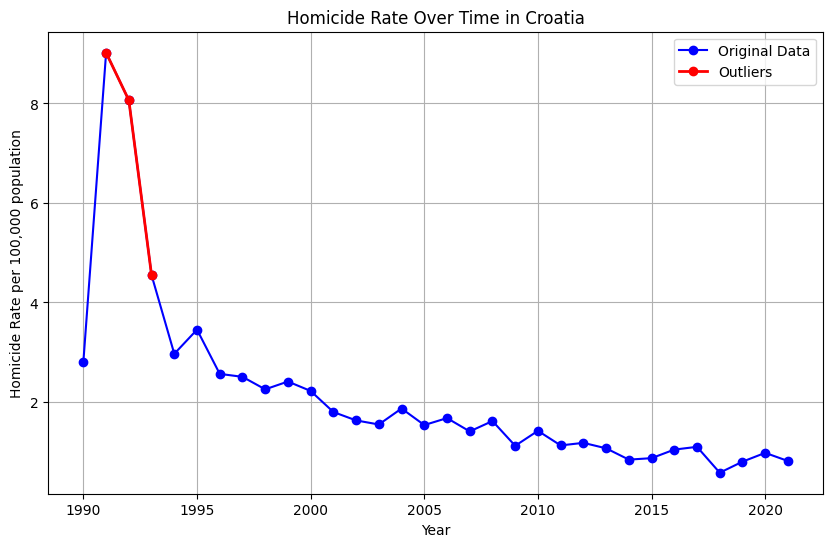

In [111]:
homicide_grafico(homicide_rate, df_outliers_homicide, 'Croatia')

## Función para hacer gráfico de outliers de GDP

In [112]:
def gdp_grafico(gdp_df, outliers_df, country):
    # Filtrar los datos originales para el país especificado y a partir de 1990
    country_data_original = gdp_df[
        (gdp_df['Entity'] == country) & (gdp_df['Year'] >= 1990)
    ]

    # Filtrar los outliers para el país especificado
    country_outliers = outliers_df[outliers_df['pais'] == country]

    plt.figure(figsize=(10, 6))

    # Graficar los datos originales
    plt.plot(country_data_original['Year'], 
             country_data_original['GDP per capita (output, multiple price benchmarks)'], 
             marker='o', linestyle='-', color='blue', label='Original Data')

    # Graficar los outliers
    plt.plot(country_outliers['year'], 
             country_outliers['outlier_value'], 
             marker='o', linestyle='-', color='red', label='Outliers', linewidth=2)

    # Título y etiquetas
    plt.title(f'GDP per capita in {country}')
    plt.xlabel('Year')
    plt.ylabel('GDP per capita (output, multiple price benchmarks)')
    plt.grid(True)

    # Mostrar leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.show()

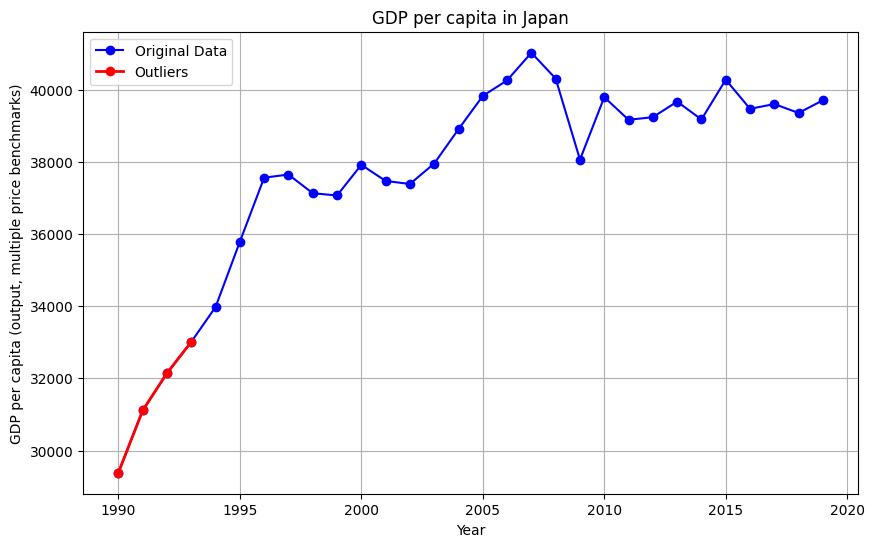

In [113]:
gdp_grafico(gdp_per_capita, df_outliers_gdp, 'Japan')

# Outliers de las variables más importantes con mayor correlación

## Outliers de las muertes por Alzheimer

In [114]:
Alzeimer = "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)"
outliers_alzheimer = df_outliers_numberofdeaths[df_outliers_numberofdeaths.variable == Alzeimer]
outliers_alzheimer

pais                                           variable  \
379             Bangladesh  Deaths - Alzheimer's disease and other dementi...   
378             Bangladesh  Deaths - Alzheimer's disease and other dementi...   
377             Bangladesh  Deaths - Alzheimer's disease and other dementi...   
376             Bangladesh  Deaths - Alzheimer's disease and other dementi...   
1271              Dominica  Deaths - Alzheimer's disease and other dementi...   
1272              Dominica  Deaths - Alzheimer's disease and other dementi...   
1520              Eswatini  Deaths - Alzheimer's disease and other dementi...   
1519              Eswatini  Deaths - Alzheimer's disease and other dementi...   
1518              Eswatini  Deaths - Alzheimer's disease and other dementi...   
1517              Eswatini  Deaths - Alzheimer's disease and other dementi...   
1516              Eswatini  Deaths - Alzheimer's disease and other dementi...   
1515              Eswatini  Deaths - Alzheimer's disease and other dementi...   
1713               Germany  Deaths - Alzheimer's disease and other dementi...   
1712               Germany  Deaths - Alzheimer's disease and other dementi...   
1796               Grenada  Deaths - Alzheimer's disease and other dementi...   
2220                Jordan  Deaths - Alzheimer's disease and other dementi...   
2275            Kazakhstan  Deaths - Alzheimer's disease and other dementi...   
2274            Kazakhstan  Deaths - Alzheimer's disease and other dementi...   
2725      Marshall Islands  Deaths - Alzheimer's disease and other dementi...   
2726      Marshall Islands  Deaths - Alzheimer's disease and other dementi...   
2727      Marshall Islands  Deaths - Alzheimer's disease and other dementi...   
2728      Marshall Islands  Deaths - Alzheimer's disease and other dementi...   
2729      Marshall Islands  Deaths - Alzheimer's disease and other dementi...   
2730      Marshall Islands  Deaths - Alzheimer's disease and other dementi...   
2731      Marshall Islands  Deaths - Alzheimer's disease and other dementi...   
2894              Mongolia  Deaths - Alzheimer's disease and other dementi...   
2893              Mongolia  Deaths - Alzheimer's disease and other dementi...   
2892              Mongolia  Deaths - Alzheimer's disease and other dementi...   
2891              Mongolia  Deaths - Alzheimer's disease and other dementi...   
3285              Pakistan  Deaths - Alzheimer's disease and other dementi...   
3284              Pakistan  Deaths - Alzheimer's disease and other dementi...   
4468                Tuvalu  Deaths - Alzheimer's disease and other dementi...   
4469                Tuvalu  Deaths - Alzheimer's disease and other dementi...   
4470                Tuvalu  Deaths - Alzheimer's disease and other dementi...   
4471                Tuvalu  Deaths - Alzheimer's disease and other dementi...   
4472                Tuvalu  Deaths - Alzheimer's disease and other dementi...   
4544  United Arab Emirates  Deaths - Alzheimer's disease and other dementi...   
4543  United Arab Emirates  Deaths - Alzheimer's disease and other dementi...   

      year  outlier_value  
379   2016          12037  
378   2017          13346  
377   2018          14478  
376   2019          15614  
1271  1990             15  
1272  1991             15  
1520  1990             31  
1519  2015             46  
1518  2016             48  
1517  2017             50  
1516  2018             52  
1515  2019             55  
1713  2018          47417  
1712  2019          49557  
1796  1990             18  
2220  2019            767  
2275  2018           2263  
2274  2019           2319  
2725  2013              3  
2726  2014              3  
2727  2015              3  
2728  2016              3  
2729  2017              3  
2730  2018              3  
2731  2019              3  
2894  2016            189  
2893  2017            199  
2892  2018            212  
2891  2019            225  
3285  2018          10

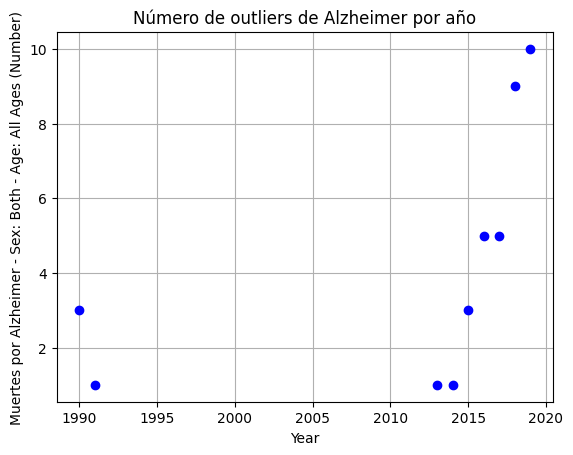

In [115]:
alzheimer_grafico = outliers_alzheimer.groupby(["year"])["variable"].count().reset_index().sort_values(by = "year")

# Gráfico de dispersión con línea que conecta los puntos solo para "Germany"
plt.plot(alzheimer_grafico['year'], alzheimer_grafico['variable'], marker='o', linestyle='', color='blue')

# Título y etiquetas
plt.title('Número de outliers de Alzheimer por año')
plt.xlabel('Year')
plt.ylabel("Muertes por Alzheimer - Sex: Both - Age: All Ages (Number)")
plt.grid(True)

# Mostrar el gráfico
plt.show()

## Outliers de muertes por Parkinson

In [116]:
Parkinson = "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)"
outliers_parkinson = df_outliers_numberofdeaths[df_outliers_numberofdeaths.variable == Parkinson]
outliers_parkinson

pais  \
398              Bangladesh   
397              Bangladesh   
546                 Bermuda   
547                 Bermuda   
548                 Bermuda   
872              Cape Verde   
873              Cape Verde   
1023           Cook Islands   
1024           Cook Islands   
1025           Cook Islands   
1026           Cook Islands   
1172                 Cyprus   
1822                Grenada   
1823                Grenada   
1824                Grenada   
1825                Grenada   
1820                Grenada   
1821                Grenada   
2264                 Jordan   
2321               Kiribati   
2322               Kiribati   
2323               Kiribati   
2324               Kiribati   
2325               Kiribati   
2326               Kiribati   
2327               Kiribati   
2318               Kiribati   
2319               Kiribati   
2320               Kiribati   
2601             Madagascar   
2844   Micronesia (country)   
2845   Micronesia (country)   
2846   Micronesia (country)   
2847   Micronesia (country)   
2848   Micronesia (country)   
2849   Micronesia (country)   
2850   Micronesia (country)   
2869                Moldova   
2870                Moldova   
2926               Mongolia   
3605                 Rwanda   
3625  Saint Kitts and Nevis   
3626  Saint Kitts and Nevis   
3627  Saint Kitts and Nevis   
3628  Saint Kitts and Nevis   
3680            Saint Lucia   
3681            Saint Lucia   
4182                 Sweden   
4181                 Sweden   

                                               variable  year  outlier_value  
398   Deaths - Parkinson's disease - Sex: Both - Age...  2018           4221  
397   Deaths - Parkinson's disease - Sex: Both - Age...  2019           4489  
546   Deaths - Parkinson's disease - Sex: Both - Age...  2017              8  
547   Deaths - Parkinson's disease - Sex: Both - Age...  2018              8  
548   Deaths - Parkinson's disease - Sex: Both - Age...  2019              8  
872   Deaths - Parkinson's disease - Sex: Both - Age...  2018             26  
873   Deaths - Parkinson's disease - Sex: Both - Age...  2019             25  
1023  Deaths - Parkinson's disease - Sex: Both - Age...  2016              2  
1024  Deaths - Parkinson's disease - Sex: Both - Age...  2017              2  
1025  Deaths - Parkinson's disease - Sex: Both - Age...  2018              2  
1026  Deaths - Parkinson's disease - Sex: Both - Age...  2019              2  
1172  Deaths - Parkinson's disease - Sex: Both - Age...  2019             94  
1822  Deaths - Parkinson's disease - Sex: Both - Age...  1995              3  
1823  Deaths - Parkinson's disease - Sex: Both - Age...  1996              3  
1824  Deaths - Parkinson's disease - Sex: Both - Age...  1997              3  
1825  Deaths - Parkinson's disease - Sex: Both - Age...  1998              3  
1820  Deaths - Parkinson's disease - Sex: Both - Age...  2018              5  
1821  Deaths - Parkinson's disease - Sex: Both - Age...  2019              5  
2264  Deaths - Parkinson's disease - Sex: Both - Age...  2019            192  
2321  Deaths - Parkinson's disease - Sex: Both - Age...  1990              3  
2322  Deaths - Parkinson's disease - Sex: Both - Age...  1991              3  
2323  Deaths - Parkinson's disease - Sex: Both - Age...  1992              3  
2324  Deaths - Parkinson's disease - Sex: Both - Age...  1993              3  
2325  Deaths - Parkinson's disease - Sex: Both - Age...  1994              3  
2326  Deaths - Parkinson's disease - Sex: Both - Age...  1995              3  
2327  Deaths - Parkinson's disease - Sex: Both - Age...  1996              3  
2318  Deaths - Parkinson's disease - Sex: Both - Age...  2017              5  
2319  Deaths - Parkinson's disease - Sex: Both - Age...  2018              5  
2320  Deaths - Parkinson's disease - Sex: Both - Age...  2019              5  
2601  Deaths - Parkinson's disease - Sex: Both - Age...  2019            208  
2844  Deaths - Parkinso

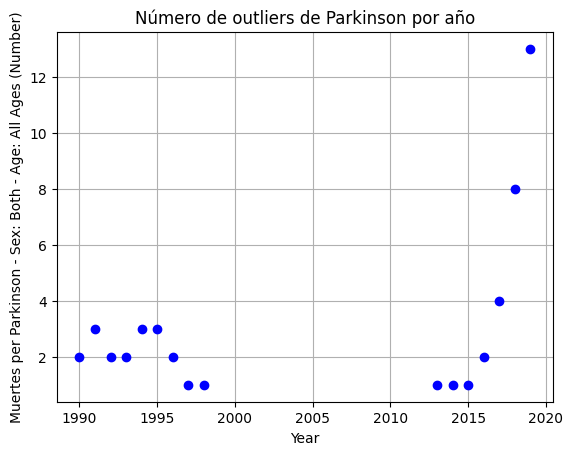

In [117]:
parkinson_grafico = outliers_parkinson.groupby(["year"])["variable"].count().reset_index().sort_values(by = "year")

# Gráfico de dispersión con línea que conecta los puntos solo para "Germany"
plt.plot(parkinson_grafico['year'], parkinson_grafico['variable'], marker='o', linestyle='', color='blue')

# Título y etiquetas
plt.title('Número de outliers de Parkinson por año')
plt.xlabel('Year')
plt.ylabel("Muertes per Parkinson - Sex: Both - Age: All Ages (Number)")
plt.grid(True)

# Mostrar el gráfico
plt.show()

## Outliers de muertes por Neoplasms

In [118]:
Neoplasms = "Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)"
outliers_neoplasm = df_outliers_numberofdeaths[df_outliers_numberofdeaths.variable == Neoplasms]
outliers_neoplasm

pais  \
785                 Burundi   
871              Cape Verde   
870              Cape Verde   
1448                England   
1447                England   
1446                England   
1445                England   
1444                England   
1578               Ethiopia   
1577               Ethiopia   
1576               Ethiopia   
1575               Ethiopia   
2382                   Laos   
2659               Maldives   
3585                 Russia   
3584                 Russia   
3604                 Rwanda   
3603                 Rwanda   
3624  Saint Kitts and Nevis   
3623  Saint Kitts and Nevis   
3829               Scotland   
4050           South Africa   
4049           South Africa   
4047           South Africa   
4048           South Africa   
4463           Turkmenistan   
4462           Turkmenistan   
4492                 Tuvalu   
4571         United Kingdom   
4570         United Kingdom   
4569         United Kingdom   
4659             Uzbekistan   
4658             Uzbekistan   
4752                  Wales   

                                               variable  year  outlier_value  
785   Deaths - Neoplasms - Sex: Both - Age: All Ages...  2019           5275  
871   Deaths - Neoplasms - Sex: Both - Age: All Ages...  2018            713  
870   Deaths - Neoplasms - Sex: Both - Age: All Ages...  2019            717  
1448  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2015         150941  
1447  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2016         152622  
1446  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2017         154182  
1445  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2018         157938  
1444  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2019         160593  
1578  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2016          35633  
1577  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2017          37017  
1576  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2018          38393  
1575  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2019          39600  
2382  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2019           4975  
2659  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2019            214  
3585  Deaths - Neoplasms - Sex: Both - Age: All Ages...  1993         335217  
3584  Deaths - Neoplasms - Sex: Both - Age: All Ages...  1994         354235  
3604  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2018           6837  
3603  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2019           7143  
3624  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2018             90  
3623  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2019             99  
3829  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2019          19529  
4050  Deaths - Neoplasms - Sex: Both - Age: All Ages...  1990          27724  
4049  Deaths - Neoplasms - Sex: Both - Age: All Ages...  1991          28947  
4047  Deaths - Neoplasms - Sex: Both - Age: All Ages...  1992          31303  
4048  Deaths - Neoplasms - Sex: Both - Age: All Ages...  1993          31285  
4463  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2018           3551  
4462  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2019           3636  
4492  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2019             14  
4571  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2017         187620  
4570  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2018         192771  
4569  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2019         195999  
4659  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2018          21879  
4658  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2019          22338  
4752  Deaths - Neoplasms - Sex: Both - Age: All Ages...  2019          10569

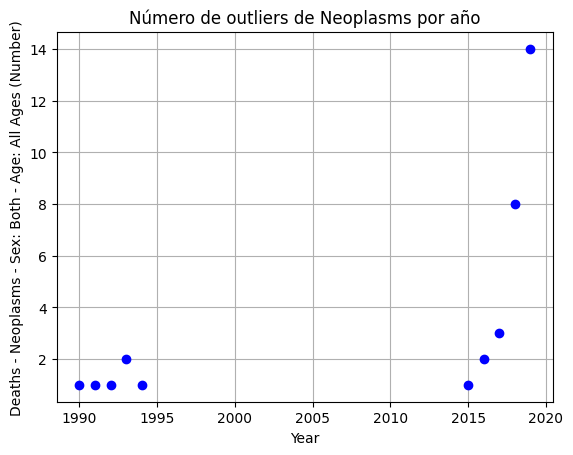

In [119]:
neoplasms_grafico = outliers_neoplasm.groupby(["year"])["variable"].count().reset_index().sort_values(by = "year")

# Gráfico de dispersión con línea que conecta los puntos solo para "Germany"
plt.plot(neoplasms_grafico['year'], neoplasms_grafico['variable'], marker='o', linestyle='', color='blue')

# Título y etiquetas
plt.title('Número de outliers de Neoplasms por año')
plt.xlabel('Year')
plt.ylabel("Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)")
plt.grid(True)

# Mostrar el gráfico
plt.show()

## Outliers de muertes por Kidney Disease

In [120]:
kidney_disease = "Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)"
outliers_kidney = df_outliers_numberofdeaths[df_outliers_numberofdeaths.variable == kidney_disease]
outliers_kidney

pais                                           variable  \
56            Albania  Deaths - Chronic kidney disease - Sex: Both - ...   
55            Albania  Deaths - Chronic kidney disease - Sex: Both - ...   
54            Albania  Deaths - Chronic kidney disease - Sex: Both - ...   
53            Albania  Deaths - Chronic kidney disease - Sex: Both - ...   
768           Burundi  Deaths - Chronic kidney disease - Sex: Both - ...   
832        Cape Verde  Deaths - Chronic kidney disease - Sex: Both - ...   
833        Cape Verde  Deaths - Chronic kidney disease - Sex: Both - ...   
1182          Czechia  Deaths - Chronic kidney disease - Sex: Both - ...   
1181          Czechia  Deaths - Chronic kidney disease - Sex: Both - ...   
1180          Czechia  Deaths - Chronic kidney disease - Sex: Both - ...   
1179          Czechia  Deaths - Chronic kidney disease - Sex: Both - ...   
1544         Ethiopia  Deaths - Chronic kidney disease - Sex: Both - ...   
1543         Ethiopia  Deaths - Chronic kidney disease - Sex: Both - ...   
1542         Ethiopia  Deaths - Chronic kidney disease - Sex: Both - ...   
1541         Ethiopia  Deaths - Chronic kidney disease - Sex: Both - ...   
1540         Ethiopia  Deaths - Chronic kidney disease - Sex: Both - ...   
1753           Greece  Deaths - Chronic kidney disease - Sex: Both - ...   
1752           Greece  Deaths - Chronic kidney disease - Sex: Both - ...   
1750           Greece  Deaths - Chronic kidney disease - Sex: Both - ...   
1751           Greece  Deaths - Chronic kidney disease - Sex: Both - ...   
1749           Greece  Deaths - Chronic kidney disease - Sex: Both - ...   
1748           Greece  Deaths - Chronic kidney disease - Sex: Both - ...   
2284       Kazakhstan  Deaths - Chronic kidney disease - Sex: Both - ...   
2283       Kazakhstan  Deaths - Chronic kidney disease - Sex: Both - ...   
2282       Kazakhstan  Deaths - Chronic kidney disease - Sex: Both - ...   
2281       Kazakhstan  Deaths - Chronic kidney disease - Sex: Both - ...   
2280       Kazakhstan  Deaths - Chronic kidney disease - Sex: Both - ...   
2279       Kazakhstan  Deaths - Chronic kidney disease - Sex: Both - ...   
2276       Kazakhstan  Deaths - Chronic kidney disease - Sex: Both - ...   
2277       Kazakhstan  Deaths - Chronic kidney disease - Sex: Both - ...   
2278       Kazakhstan  Deaths - Chronic kidney disease - Sex: Both - ...   
2642         Maldives  Deaths - Chronic kidney disease - Sex: Both - ...   
3589           Rwanda  Deaths - Chronic kidney disease - Sex: Both - ...   
3588           Rwanda  Deaths - Chronic kidney disease - Sex: Both - ...   
3987  Solomon Islands  Deaths - Chronic kidney disease - Sex: Both - ...   
3986  Solomon Islands  Deaths - Chronic kidney disease - Sex: Both - ...   
3985  Solomon Islands  Deaths - Chronic kidney disease - Sex: Both - ...   
3984  Solomon Islands  Deaths - Chronic kidney disease - Sex: Both - ...   
4330          Tokelau  Deaths - Chronic kidney disease - Sex: Both - ...   
4331          Tokelau  Deaths - Chronic kidney disease - Sex: Both - ...   
4332          Tokelau  Deaths - Chronic kidney disease - Sex: Both - ...   
4333          Tokelau  Deaths - Chronic kidney disease - Sex: Both - ...   
4334          Tokelau  Deaths - Chronic kidney disease - Sex: Both - ...   
4335          Tokelau  Deaths - Chronic kidney disease - Sex: Both - ...   
4707          Vietnam  Deaths - Chronic kidney disease - Sex: Both - ...   

      year  outlier_value  
56    2016            307  
55    2017            314  
54    2018            321  
53    2019            329  
768   2019           1040  
832   2018            105  
833   2019            105  
1182  2016           1248  
1181  2017           1285  
1180  2018           1309  
1179  2019           1317  
1544  2015           8790  
1543  2016           9026  
1542  2017           9286  
1541  2018           9585  
1540  2019           9860  
1753  2014           3844  
1752  2015      

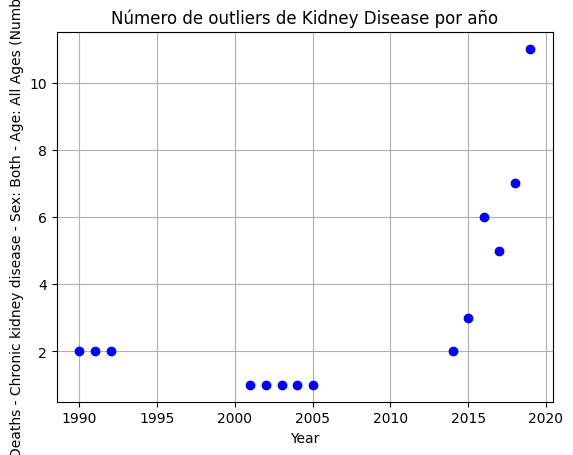

In [121]:
kidney_grafico = outliers_kidney.groupby(["year"])["variable"].count().reset_index().sort_values(by = "year")

# Gráfico de dispersión con línea que conecta los puntos solo para "Germany"
plt.plot(kidney_grafico['year'], kidney_grafico['variable'], marker='o', linestyle='', color='blue')

# Título y etiquetas
plt.title('Número de outliers de Kidney Disease por año')
plt.xlabel('Year')
plt.ylabel("Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)")
plt.grid(True)

# Mostrar el gráfico
plt.show()

## Outliers de "Number below $40 a day"

In [122]:
df_outliers_poverty = obtener_outliers(poverty_explorer)
df_outliers_poverty

pais                                           variable  year  \
0     Albania                              Number below $1 a day  1996   
3     Albania                             Number below $40 a day  1996   
4     Albania                               Share below $1 a day  1996   
9     Albania                              poverty_gap_index_100  1996   
12    Albania                                total_shortfall_100  1996   
...       ...                                                ...   ...   
7832   Zambia  40% of median - total number of people below p...  2015   
7835   Zambia  50% of median - total number of people below p...  2015   
7838   Zambia  60% of median - total number of people below p...  2015   
7891   Zambia                          total_shortfall_50_median  2015   
7893   Zambia                          total_shortfall_60_median  2015   

      outlier_value  
0      1.819000e+03  
3      3.166501e+06  
4      5.741582e-02  
9      2.253264e-03  
12     7.138416e+01  
...             ...  
7832   2.812781e+06  
7835   3.969598e+06  
7838   5.062870e+06  
7891   1.155772e+06  
7893   1.878205e+06  

[7896 rows x 4 columns]

In [123]:
forty_dollars_a_day = "Number below $40 a day"
outliers_forty_dollars = df_outliers_poverty[df_outliers_poverty.variable == forty_dollars_a_day]
outliers_forty_dollars

pais                variable  year  outlier_value
3               Albania  Number below $40 a day  1996   3.166501e+06
29    Argentina (urban)  Number below $40 a day  2020   3.600164e+07
235          Azerbaijan  Number below $40 a day  1995   7.679727e+06
379             Belgium  Number below $40 a day  1992   6.123760e+06
380             Belgium  Number below $40 a day  1997   4.937001e+06
1177              China  Number below $40 a day  1990   1.135047e+09
1176              China  Number below $40 a day  1993   1.178305e+09
1558            Czechia  Number below $40 a day  2019   6.824093e+06
1559            Czechia  Number below $40 a day  2020   6.821455e+06
1679            Denmark  Number below $40 a day  1992   2.184522e+06
1746           Djibouti  Number below $40 a day  2002   7.874520e+05
1892        El Salvador  Number below $40 a day  1991   5.367533e+06
2103            Finland  Number below $40 a day  1995   3.485755e+06
2268            Georgia  Number below $40 a day  1996   4.464635e+06
2629            Hungary  Number below $40 a day  2020   7.950896e+06
2754              India  Number below $40 a day  1993   9.260431e+08
2790      India (rural)  Number below $40 a day  1993   6.835760e+08
2831      India (urban)  Number below $40 a day  1993   2.424672e+08
3359             Israel  Number below $40 a day  1992   4.495152e+06
3358             Israel  Number below $40 a day  1997   4.960124e+06
3357             Israel  Number below $40 a day  2001   5.149539e+06
3432              Italy  Number below $40 a day  1995   3.919710e+07
3576            Jamaica  Number below $40 a day  1990   2.352941e+06
3575            Jamaica  Number below $40 a day  2004   2.516627e+06
4704            Moldova  Number below $40 a day  2018   2.692599e+06
4705            Moldova  Number below $40 a day  2019   2.648564e+06
4706            Moldova  Number below $40 a day  2021   2.600013e+06
4945        Netherlands  Number below $40 a day  1993   8.637525e+06
5195    North Macedonia  Number below $40 a day  2008   1.860612e+06
5442           Paraguay  Number below $40 a day  1990   3.800068e+06
5779           Portugal  Number below $40 a day  2019   7.418341e+06
5780           Portugal  Number below $40 a day  2020   7.195203e+06
6657       South Africa  Number below $40 a day  1993   4.133737e+07
6656       South Africa  Number below $40 a day  2014   5.098356e+07
6966         Tajikistan  Number below $40 a day  2015   8.512949e+06
7011           Thailand  Number below $40 a day  1990   5.472338e+07
7124             Turkey  Number below $40 a day  1994   5.710065e+07
7432      United States  Number below $40 a day  2020   7.624388e+07
7431      United States  Number below $40 a day  2021   7.636647e+07

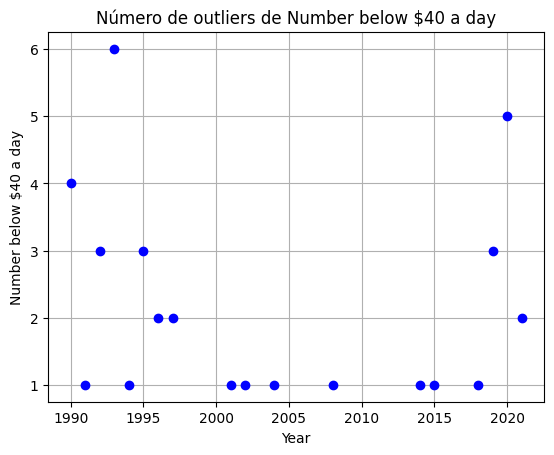

In [124]:
forty_dollars_grafico = outliers_forty_dollars.groupby(["year"])["variable"].count().reset_index().sort_values(by = "year")

# Gráfico de dispersión con línea que conecta los puntos solo para "Germany"
plt.plot(forty_dollars_grafico['year'], forty_dollars_grafico['variable'], marker='o', linestyle='', color='blue')

# Título y etiquetas
plt.title('Número de outliers de Number below $40 a day')
plt.xlabel('Year')
plt.ylabel("Number below $40 a day")
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [125]:
def plot_variable_data(annual_number_deaths, df_outliers_numberofdeaths, country, variable):
    # Filtrar los datos originales para el país especificado y a partir de 1990
    country_data_original = annual_number_deaths[
        (annual_number_deaths['Entity'] == country) & 
        (annual_number_deaths['Year'] >= 1990)
    ]

    # Filtrar los outliers para el país y la variable especificada
    country_outliers = df_outliers_numberofdeaths[
        (df_outliers_numberofdeaths['pais'] == country) & 
        (df_outliers_numberofdeaths['variable'] == variable)
    ]

    plt.figure(figsize=(10, 6))

    # Graficar los datos originales
    plt.plot(country_data_original['Year'], 
             country_data_original[variable], 
             marker='o', linestyle='-', color='blue', label='Original Data')

    # Graficar los outliers
    plt.plot(country_outliers['year'], 
             country_outliers['outlier_value'], 
             marker='o', linestyle='-', color='red', label='Outliers', linewidth=2)

    # Título y etiquetas
    plt.title(f'{variable} Over Time in {country}')
    plt.xlabel('Year')
    plt.ylabel(variable)
    plt.grid(True)

    # Mostrar leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.show()

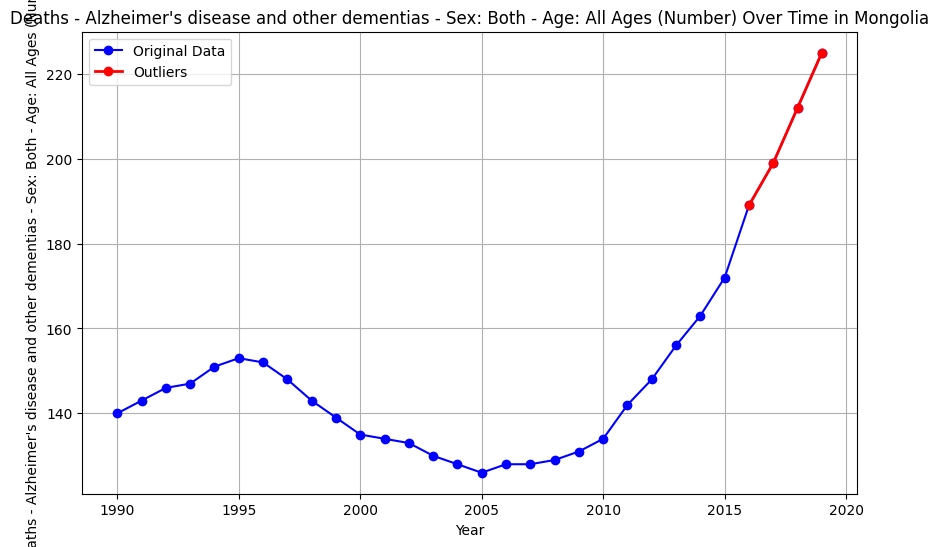

In [126]:
plot_variable_data(
    annual_number_deaths, 
    df_outliers_numberofdeaths, 
    country='Mongolia', 
    variable="Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)"
)

In [127]:
df_outliers_publichealthcare = obtener_outliers(public_healthcare)
df_outliers_publichealthcare

pais                                           variable  year  \
1   Afghanistan  Domestic general government health expenditure...  2002   
0   Afghanistan  Domestic general government health expenditure...  2019   
2        Angola  Domestic general government health expenditure...  2009   
3     Australia  Domestic general government health expenditure...  2019   
4        Bhutan  Domestic general government health expenditure...  2000   
..          ...                                                ...   ...   
60       Tuvalu  Domestic general government health expenditure...  2000   
61      Ukraine  Domestic general government health expenditure...  2000   
64      Vanuatu  Domestic general government health expenditure...  2014   
63      Vanuatu  Domestic general government health expenditure...  2016   
62      Vanuatu  Domestic general government health expenditure...  2017   

    outlier_value  
1        0.084181  
0        1.084431  
2        2.600458  
3        7.104251  
4        3.542629  
..            ...  
60      24.113354  
61       2.511325  
64       0.587647  
63       1.327976  
62       1.466238  

[65 rows x 4 columns]

# Random Forest

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import plot_tree

# Evaluacion
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [129]:
dataframes = [life_expectancy, homicide_rate, suicide_rate, annual_number_deaths, gdp_per_capita, global_vaccionation_coverage, poverty_explorer, public_healthcare]
names = ['life_expectancy', 'annual_number_of_deaths_by_cause', 'death_rate_from_suicides', 'homicide_rate', 'suicide_rate', 'gdp_per_capita', 'global_vaccionation_coverage', 'poverty_explorer', 'public_healthcare']
# Convertimos la lista en un diccionario
dataframes = dict(zip(names, dataframes))

# Código para preparar el Random Forest de Life Expectancy > Q90

In [130]:
# Unificar las tablas en una sola utilizando "Entity", "Year" como claves
merged_df = dataframes['life_expectancy']

# Uniendo las demás tablas
for name, df in dataframes.items():
    if name != 'life_expectancy':
        # Eliminar o renombrar columnas duplicadas antes de fusionar
        columns_to_remove = [col for col in df.columns if col in merged_df.columns and col not in ["Entity", "Year"]]
        df = df.drop(columns=columns_to_remove)
        
        # Realizar la fusión
        merged_df = pd.merge(merged_df, df, on=["Entity", "Year"], how="left")

# Renombrar la columna de esperanza de vida para mayor claridad
merged_df = merged_df.rename(columns={"Period life expectancy at birth - Sex: all - Age: 0": "Life Expectancy"})

# Calcular el percentil 90 de la esperanza de vida
q90 = merged_df["Life Expectancy"].quantile(0.90)

# Crear la variable objetivo
merged_df['Life Expectancy > q90'] = (merged_df["Life Expectancy"] > q90).astype(int)

# Eliminar columnas no deseadas
columns_to_drop = ["Year", "Entity", "Code", "Life Expectancy"]
X = merged_df.drop(columns=columns_to_drop + ['Life Expectancy > q90'], errors='ignore')
y = merged_df['Life Expectancy > q90']

# Verificamos las primeras filas del dataframe preparado
X.head(), y.head(), q90

(   Homicide rate per 100,000 population - Both sexes - All ages  \
 0                                                NaN              
 1                                                NaN              
 2                                                NaN              
 3                                                NaN              
 4                                                NaN              
 
    Age-standardized suicide rate - Sex: both sexes  \
 0                                              NaN   
 1                                              NaN   
 2                                              NaN   
 3                                              NaN   
 4                                              NaN   
 
    Deaths - Meningitis - Sex: Both - Age: All Ages (Number)  \
 0                                             2159.0          
 1                                             2218.0          
 2                                             2475.0          
 3

In [131]:
y.value_counts()

Life Expectancy > q90
0    7401
1     823
Name: count, dtype: int64

### Función para añadir los porcentajes de los Top Features a la tabla final

In [132]:
# Función para agregar el porcentaje de importancia de las 3 primeras características
def agregar_porcentaje_importancia(resultados_rf, importance_df, modelo_numero=0):
    """
    Esta función agrega el porcentaje de importancia a las tres primeras características
    más importantes en la tabla de resultados_rf, basado en el total de importancia.
    """
    # Calcular el total de la importancia de todas las características
    total_importance = importance_df['importance'].sum()

    # Procesar las tres primeras características
    for i in range(1, 4):  # Para las tres primeras características
        # Extraer la columna de la tabla resultados_rf
        feature_col = f"Top_Feature_{i}"
        feature_name = resultados_rf.at[modelo_numero, feature_col]
        
        # Si la característica existe en el importance_df
        if feature_name in importance_df['feature'].values:
            # Obtener la importancia de la característica
            importancia = importance_df.loc[importance_df['feature'] == feature_name, 'importance'].values[0]
            porcentaje = (importancia / total_importance) * 100  # Calcular el porcentaje
            
            # Actualizar la tabla resultados_rf con el nombre de la característica y su porcentaje
            resultados_rf.at[modelo_numero, feature_col] = f"{feature_name} ({porcentaje:.2f}%)"

In [133]:
# Inicializar un DataFrame vacío para almacenar los resultados de los modelos
resultados_rf = pd.DataFrame(columns=[
    'Modelo', 'Accuracy', 'Precision_0', 'Recall_0', 'F1_0', 
    'Precision_1', 'Recall_1', 'F1_1',
    'Top_Feature_1', 'Top_Feature_2', 'Top_Feature_3', 
    'Top_Feature_4', 'Top_Feature_5', 'Top_Feature_6', 
    'Top_Feature_7', 'Top_Feature_8', 'Top_Feature_9', 'Top_Feature_10'
])

## Modelo 0 Q90 - median

In [134]:
# Imputación de valores faltantes
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth= 3)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Importancia de las características
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

importance_df.head(10), report

(                                               feature  importance
 0    Homicide rate per 100,000 population - Both se...    0.066169
 99                             avg_shortfall_60_median    0.063739
 90                                         decile8_thr    0.058466
 68                Median income or consumption per day    0.038367
 98                             avg_shortfall_50_median    0.034070
 138                                        decile4_avg    0.033215
 140                                        decile6_avg    0.032967
 143                                        decile9_avg    0.028075
 142                                        decile8_avg    0.027219
 139                                        decile5_avg    0.026883,
 {'0': {'precision': 0.9223424570337365,
   'recall': 0.9897540983606558,
   'f1-score': 0.9548599670510708,
   'support': 1464.0},
  '1': {'precision': 0.7972972972972973,
   'recall': 0.3259668508287293,
   'f1-score': 0.4627450980392157,
   'suppor

### Código para guardar los resultados del Random Forest en una tabla

In [135]:
# Este código se ejecuta cada vez que entrenas un nuevo modelo y guardas sus resultados
def guardar_resultados_rf(model_name, importance_df, report):
    # Obtener las métricas del modelo
    accuracy = report['accuracy']
    precision_0 = report['0']['precision']
    recall_0 = report['0']['recall']
    f1_0 = report['0']['f1-score']
    precision_1 = report['1']['precision']
    recall_1 = report['1']['recall']
    f1_1 = report['1']['f1-score']

    # Obtener las diez características más importantes
    top_features = importance_df['feature'].head(10).tolist()

    # Crear un DataFrame temporal con los resultados del modelo actual
    new_row = pd.DataFrame({
        'Modelo': [model_name],
        'Accuracy': [accuracy],
        'Precision_0': [precision_0],
        'Recall_0': [recall_0],
        'F1_0': [f1_0],
        'Precision_1': [precision_1],
        'Recall_1': [recall_1],
        'F1_1': [f1_1],
        'Top_Feature_1': [top_features[0] if len(top_features) > 0 else None],
        'Top_Feature_2': [top_features[1] if len(top_features) > 1 else None],
        'Top_Feature_3': [top_features[2] if len(top_features) > 2 else None],
        'Top_Feature_4': [top_features[3] if len(top_features) > 3 else None],
        'Top_Feature_5': [top_features[4] if len(top_features) > 4 else None],
        'Top_Feature_6': [top_features[5] if len(top_features) > 5 else None],
        'Top_Feature_7': [top_features[6] if len(top_features) > 6 else None],
        'Top_Feature_8': [top_features[7] if len(top_features) > 7 else None],
        'Top_Feature_9': [top_features[8] if len(top_features) > 8 else None],
        'Top_Feature_10': [top_features[9] if len(top_features) > 9 else None]
    })

    # Concatenar los resultados del nuevo modelo al DataFrame resultados_rf
    global resultados_rf
    resultados_rf = pd.concat([resultados_rf, new_row], ignore_index=True)

    # Agregar los porcentajes a las tres primeras características
    agregar_porcentaje_importancia(resultados_rf, importance_df, modelo_numero=len(resultados_rf) - 1)

    # Guarda los resultados acumulados en un archivo CSV al final
    resultados_rf.to_csv('resultados_random_forest.csv', index=False)

In [136]:
guardar_resultados_rf("rf_q90_median", importance_df, report)

In [137]:
resultados_rf

Modelo  Accuracy  Precision_0  Recall_0     F1_0  Precision_1  \
0  rf_q90_median  0.916717     0.922342  0.989754  0.95486     0.797297   

   Recall_1      F1_1                                      Top_Feature_1  \
0  0.325967  0.462745  Homicide rate per 100,000 population - Both se...   

                     Top_Feature_2        Top_Feature_3  \
0  avg_shortfall_60_median (6.37%)  decile8_thr (5.85%)   

                          Top_Feature_4            Top_Feature_5  \
0  Median income or consumption per day  avg_shortfall_50_median   

  Top_Feature_6 Top_Feature_7 Top_Feature_8 Top_Feature_9 Top_Feature_10  
0   decile4_avg   decile6_avg   decile9_avg   decile8_avg    decile5_avg

C:\Users\User\AppData\Local\Temp\ipykernel_16520\484830108.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



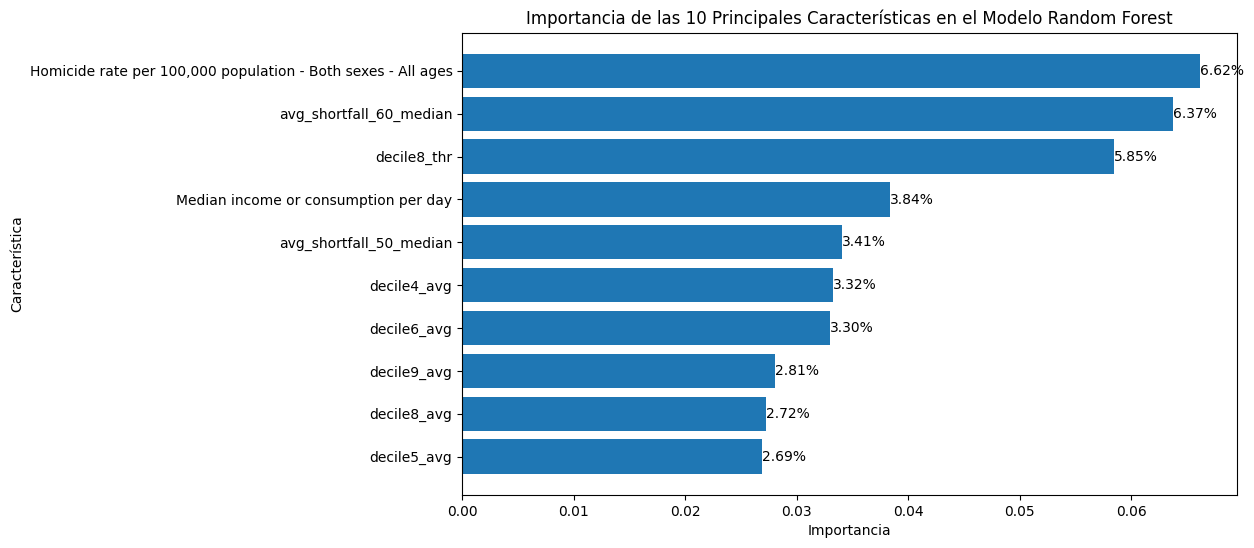

In [138]:
# Suma total de las importancias
total_importance = importance_df['importance'].sum()

# Filtrar los 10 primeros features
top_10_features = importance_df.head(10)

# Calcular los porcentajes de los 10 primeros features respecto al total
top_10_features['percentage'] = (top_10_features['importance'] / total_importance) * 100

# Crear el gráfico de barras horizontales para las 10 principales características
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_features['feature'], top_10_features['importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las 10 Principales Características en el Modelo Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior

# Añadir los porcentajes a cada barra
for bar, percentage in zip(bars, top_10_features['percentage']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{percentage:.2f}%', va='center')

# Mostrar el gráfico
plt.show()

### Plot del Primer Modelo Imputado por Median de Life Expectancy > Q90

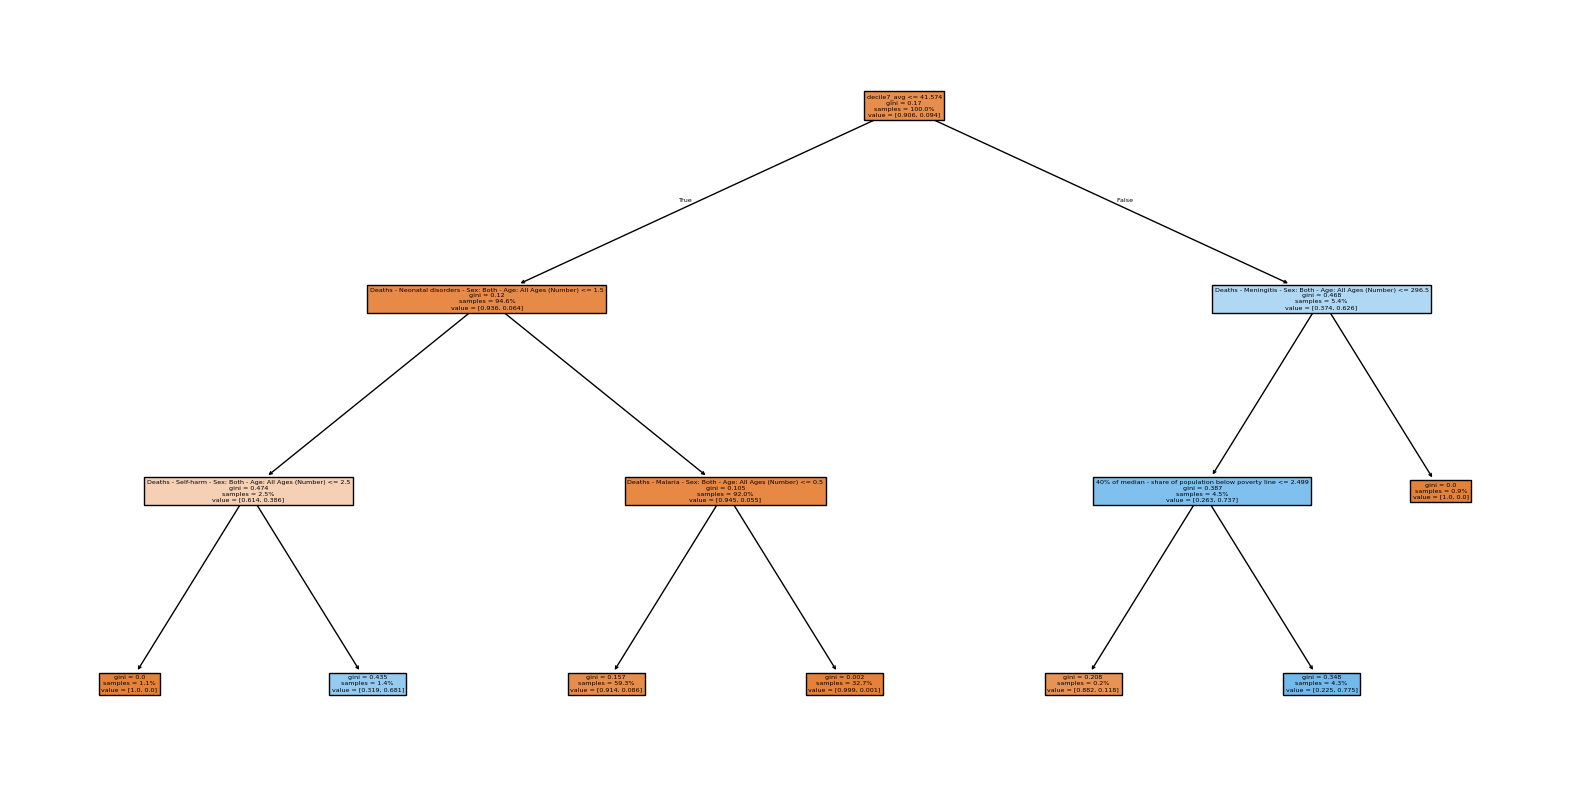

In [139]:
# Obtener el primer árbol del Random Forest
arbol_forest = model.estimators_[0]

# Hacer el plot del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(arbol_forest, feature_names = X.columns, filled=True, proportion=True)
plt.show()

## Modelo 1 Q90 - mean

In [140]:
# Imputación de valores faltantes
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth= 3)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Importancia de las características
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

importance_df.head(10), report

(                                               feature  importance
 0    Homicide rate per 100,000 population - Both se...    0.065183
 99                             avg_shortfall_60_median    0.061289
 90                                         decile8_thr    0.058203
 68                Median income or consumption per day    0.036602
 98                             avg_shortfall_50_median    0.033389
 138                                        decile4_avg    0.032758
 140                                        decile6_avg    0.032181
 143                                        decile9_avg    0.026755
 139                                        decile5_avg    0.026613
 142                                        decile8_avg    0.026246,
 {'0': {'precision': 0.9218551461245235,
   'recall': 0.9911202185792349,
   'f1-score': 0.9552337063857801,
   'support': 1464.0},
  '1': {'precision': 0.8169014084507042,
   'recall': 0.32044198895027626,
   'f1-score': 0.4603174603174603,
   'suppo

### Añadimos el Modelo 1 a la tabla con los demás modelos

In [141]:
guardar_resultados_rf("rf_q90_mean", importance_df, report)

In [142]:
resultados_rf

Modelo  Accuracy  Precision_0  Recall_0      F1_0  Precision_1  \
0  rf_q90_median  0.916717     0.922342  0.989754  0.954860     0.797297   
1    rf_q90_mean  0.917325     0.921855  0.991120  0.955234     0.816901   

   Recall_1      F1_1                                      Top_Feature_1  \
0  0.325967  0.462745  Homicide rate per 100,000 population - Both se...   
1  0.320442  0.460317  Homicide rate per 100,000 population - Both se...   

                     Top_Feature_2        Top_Feature_3  \
0  avg_shortfall_60_median (6.37%)  decile8_thr (5.85%)   
1  avg_shortfall_60_median (6.13%)  decile8_thr (5.82%)   

                          Top_Feature_4            Top_Feature_5  \
0  Median income or consumption per day  avg_shortfall_50_median   
1  Median income or consumption per day  avg_shortfall_50_median   

  Top_Feature_6 Top_Feature_7 Top_Feature_8 Top_Feature_9 Top_Feature_10  
0   decile4_avg   decile6_avg   decile9_avg   decile8_avg    decile5_avg  
1   decile4_avg   decile6_avg   decile9_avg   decile5_avg    decile8_avg

## Modelo 2 Q90 Sin Imputar

In [143]:
# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth= 3)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Importancia de las características
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

importance_df.head(10), report

(                                               feature  importance
 0    Homicide rate per 100,000 population - Both se...    0.062332
 99                             avg_shortfall_60_median    0.060340
 90                                         decile8_thr    0.053208
 68                Median income or consumption per day    0.036666
 140                                        decile6_avg    0.032099
 98                             avg_shortfall_50_median    0.031424
 138                                        decile4_avg    0.029406
 143                                        decile9_avg    0.024856
 52                               Share below $40 a day    0.024414
 142                                        decile8_avg    0.024232,
 {'0': {'precision': 0.9237611181702668,
   'recall': 0.9931693989071039,
   'f1-score': 0.9572086899275839,
   'support': 1464.0},
  '1': {'precision': 0.8591549295774648,
   'recall': 0.3370165745856354,
   'f1-score': 0.48412698412698413,
   'suppo

### Añadimos el Modelo 2 a la tabla con los demás modelos

In [144]:
guardar_resultados_rf("rf_q90_NoImputacion", importance_df, report)

In [145]:
resultados_rf

Modelo  Accuracy  Precision_0  Recall_0      F1_0  \
0        rf_q90_median  0.916717     0.922342  0.989754  0.954860   
1          rf_q90_mean  0.917325     0.921855  0.991120  0.955234   
2  rf_q90_NoImputacion  0.920973     0.923761  0.993169  0.957209   

   Precision_1  Recall_1      F1_1  \
0     0.797297  0.325967  0.462745   
1     0.816901  0.320442  0.460317   
2     0.859155  0.337017  0.484127   

                                       Top_Feature_1  \
0  Homicide rate per 100,000 population - Both se...   
1  Homicide rate per 100,000 population - Both se...   
2  Homicide rate per 100,000 population - Both se...   

                     Top_Feature_2        Top_Feature_3  \
0  avg_shortfall_60_median (6.37%)  decile8_thr (5.85%)   
1  avg_shortfall_60_median (6.13%)  decile8_thr (5.82%)   
2  avg_shortfall_60_median (6.03%)  decile8_thr (5.32%)   

                          Top_Feature_4            Top_Feature_5  \
0  Median income or consumption per day  avg_shortfall_50_median   
1  Median income or consumption per day  avg_shortfall_50_median   
2  Median income or consumption per day              decile6_avg   

             Top_Feature_6 Top_Feature_7 Top_Feature_8          Top_Feature_9  \
0              decile4_avg   decile6_avg   decile9_avg            decile8_avg   
1              decile4_avg   decile6_avg   decile9_avg            decile5_avg   
2  avg_shortfall_50_median   decile4_avg   decile9_avg  Share below $40 a day   

  Top_Feature_10  
0    decile5_avg  
1    decile8_avg  
2    decile8_avg

### Muestra de la importancia de todas las variables para el Modelo Q90 SIN IMPUTAR

C:\Users\User\AppData\Local\Temp\ipykernel_16520\484830108.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



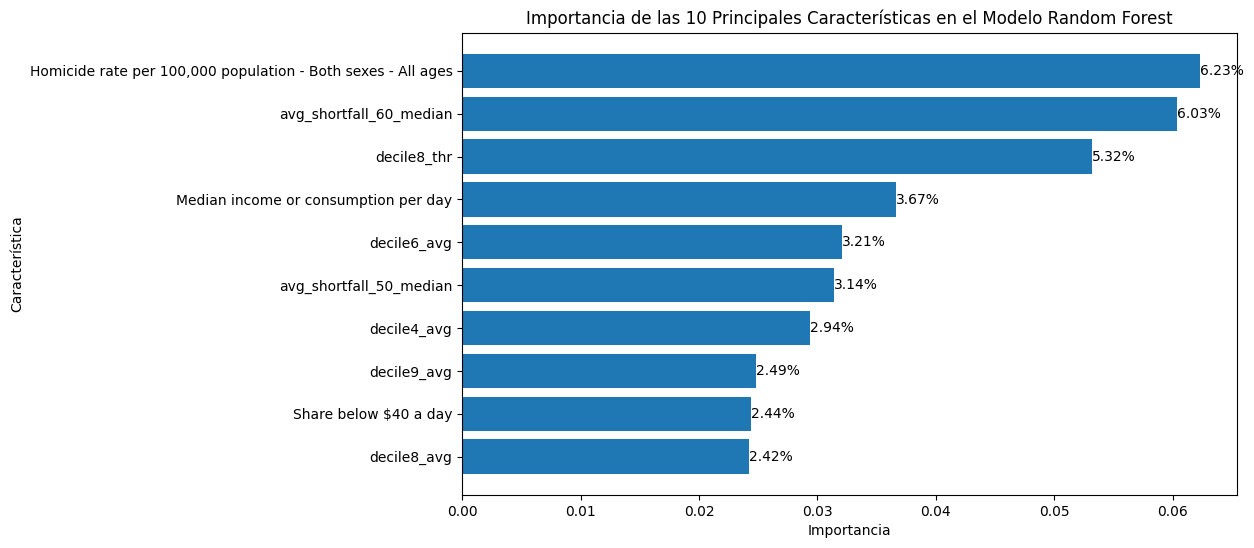

In [146]:
# Suma total de las importancias
total_importance = importance_df['importance'].sum()

# Filtrar los 10 primeros features
top_10_features = importance_df.head(10)

# Calcular los porcentajes de los 10 primeros features respecto al total
top_10_features['percentage'] = (top_10_features['importance'] / total_importance) * 100

# Crear el gráfico de barras horizontales para las 10 principales características
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_features['feature'], top_10_features['importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las 10 Principales Características en el Modelo Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior

# Añadir los porcentajes a cada barra
for bar, percentage in zip(bars, top_10_features['percentage']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{percentage:.2f}%', va='center')

# Mostrar el gráfico
plt.show()

## Modelo 3 q90 Sin imputar, max_features=75

In [147]:
# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth= 3, max_features=75)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Importancia de las características
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

importance_df.head(10), report

(                                              feature  importance
 99                            avg_shortfall_60_median    0.222990
 0   Homicide rate per 100,000 population - Both se...    0.136288
 33  GDP per capita (output, multiple price benchma...    0.084210
 98                            avg_shortfall_50_median    0.082754
 36                Hib3 (% of one-year-olds immunized)    0.050497
 34                 BCG (% of one-year-olds immunized)    0.037180
 39                PCV3 (% of one-year-olds immunized)    0.036131
 15  Deaths - Neonatal disorders - Sex: Both - Age:...    0.028999
 1     Age-standardized suicide rate - Sex: both sexes    0.028624
 2   Deaths - Meningitis - Sex: Both - Age: All Age...    0.027708,
 {'0': {'precision': 0.9233206590621039,
   'recall': 0.9952185792349727,
   'f1-score': 0.957922419460881,
   'support': 1464.0},
  '1': {'precision': 0.8955223880597015,
   'recall': 0.3314917127071823,
   'f1-score': 0.4838709677419355,
   'support': 181.0},


### Añadimos el modelo 3 a la tabla con los demás modelos

In [148]:
guardar_resultados_rf("rf_q90_median_MaxFeat75", importance_df, report)

In [149]:
resultados_rf

Modelo  Accuracy  Precision_0  Recall_0      F1_0  \
0            rf_q90_median  0.916717     0.922342  0.989754  0.954860   
1              rf_q90_mean  0.917325     0.921855  0.991120  0.955234   
2      rf_q90_NoImputacion  0.920973     0.923761  0.993169  0.957209   
3  rf_q90_median_MaxFeat75  0.922188     0.923321  0.995219  0.957922   

   Precision_1  Recall_1      F1_1  \
0     0.797297  0.325967  0.462745   
1     0.816901  0.320442  0.460317   
2     0.859155  0.337017  0.484127   
3     0.895522  0.331492  0.483871   

                                       Top_Feature_1  \
0  Homicide rate per 100,000 population - Both se...   
1  Homicide rate per 100,000 population - Both se...   
2  Homicide rate per 100,000 population - Both se...   
3                   avg_shortfall_60_median (22.30%)   

                                       Top_Feature_2  \
0                    avg_shortfall_60_median (6.37%)   
1                    avg_shortfall_60_median (6.13%)   
2                    avg_shortfall_60_median (6.03%)   
3  Homicide rate per 100,000 population - Both se...   

                                       Top_Feature_3  \
0                                decile8_thr (5.85%)   
1                                decile8_thr (5.82%)   
2                                decile8_thr (5.32%)   
3  GDP per capita (output, multiple price benchma...   

                          Top_Feature_4                        Top_Feature_5  \
0  Median income or consumption per day              avg_shortfall_50_median   
1  Median income or consumption per day              avg_shortfall_50_median   
2  Median income or consumption per day                          decile6_avg   
3               avg_shortfall_50_median  Hib3 (% of one-year-olds immunized)   

                        Top_Feature_6                        Top_Feature_7  \
0                         decile4_avg                          decile6_avg   
1                         decile4_avg                          decile6_avg   
2             avg_shortfall_50_median                          decile4_avg   
3  BCG (% of one-year-olds immunized)  PCV3 (% of one-year-olds immunized)   

                                       Top_Feature_8  \
0                                        decile9_avg   
1                                        decile9_avg   
2                                        decile9_avg   
3  Deaths - Neonatal disorders - Sex: Both - Age:...   

                                     Top_Feature_9  \
0                                      decile8_avg   
1                                      decile5_avg   
2                            Share below $40 a day   
3  Age-standardized suicide rate - Sex: both sexes   

                                      Top_Feature_10  
0                                        decile5_avg  
1                                        decile8_avg  
2                                        decile8_avg  
3  Deaths - Meningitis - Sex: Both - Age: All Age...

C:\Users\User\AppData\Local\Temp\ipykernel_16520\484830108.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



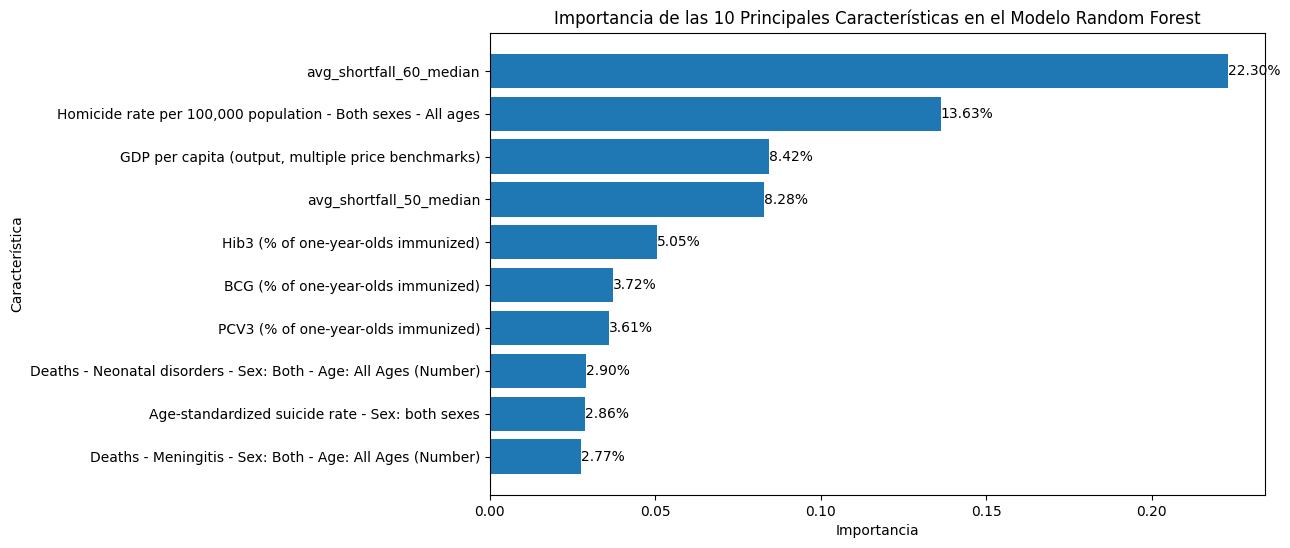

In [150]:
# Suma total de las importancias
total_importance = importance_df['importance'].sum()

# Filtrar los 10 primeros features
top_10_features = importance_df.head(10)

# Calcular los porcentajes de los 10 primeros features respecto al total
top_10_features['percentage'] = (top_10_features['importance'] / total_importance) * 100

# Crear el gráfico de barras horizontales para las 10 principales características
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_features['feature'], top_10_features['importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las 10 Principales Características en el Modelo Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior

# Añadir los porcentajes a cada barra
for bar, percentage in zip(bars, top_10_features['percentage']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{percentage:.2f}%', va='center')

# Mostrar el gráfico
plt.show()

## Modelo 4 Q90 Sin imputar, max_features=2

In [151]:
# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth= 3, max_features=2)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Importancia de las características
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

importance_df.head(10), report

(                                  feature  importance
 90                            decile8_thr    0.041908
 97                avg_shortfall_40_median    0.027694
 125                    avg_shortfall_4000    0.026474
 105                 income_gap_ratio_2000    0.025410
 144                          decile10_avg    0.024435
 51                  Share below $30 a day    0.024389
 99                avg_shortfall_60_median    0.022755
 112                poverty_gap_index_1000    0.021841
 115                poverty_gap_index_3000    0.021647
 68   Median income or consumption per day    0.021162,
 {'0': {'precision': 0.920584498094028,
   'recall': 0.9897540983606558,
   'f1-score': 0.9539170506912442,
   'support': 1464.0},
  '1': {'precision': 0.7887323943661971,
   'recall': 0.30939226519337015,
   'f1-score': 0.4444444444444444,
   'support': 181.0},
  'accuracy': 0.9148936170212766,
  'macro avg': {'precision': 0.8546584462301126,
   'recall': 0.649573181777013,
   'f1-score': 0

### Añadimos el modelo 4 a la tabla con los demás modelos

In [152]:
guardar_resultados_rf("rf_q90_median_MaxFeat2", importance_df, report)

In [153]:
resultados_rf

Modelo  Accuracy  Precision_0  Recall_0      F1_0  \
0            rf_q90_median  0.916717     0.922342  0.989754  0.954860   
1              rf_q90_mean  0.917325     0.921855  0.991120  0.955234   
2      rf_q90_NoImputacion  0.920973     0.923761  0.993169  0.957209   
3  rf_q90_median_MaxFeat75  0.922188     0.923321  0.995219  0.957922   
4   rf_q90_median_MaxFeat2  0.914894     0.920584  0.989754  0.953917   

   Precision_1  Recall_1      F1_1  \
0     0.797297  0.325967  0.462745   
1     0.816901  0.320442  0.460317   
2     0.859155  0.337017  0.484127   
3     0.895522  0.331492  0.483871   
4     0.788732  0.309392  0.444444   

                                       Top_Feature_1  \
0  Homicide rate per 100,000 population - Both se...   
1  Homicide rate per 100,000 population - Both se...   
2  Homicide rate per 100,000 population - Both se...   
3                   avg_shortfall_60_median (22.30%)   
4                                decile8_thr (4.19%)   

                                       Top_Feature_2  \
0                    avg_shortfall_60_median (6.37%)   
1                    avg_shortfall_60_median (6.13%)   
2                    avg_shortfall_60_median (6.03%)   
3  Homicide rate per 100,000 population - Both se...   
4                    avg_shortfall_40_median (2.77%)   

                                       Top_Feature_3  \
0                                decile8_thr (5.85%)   
1                                decile8_thr (5.82%)   
2                                decile8_thr (5.32%)   
3  GDP per capita (output, multiple price benchma...   
4                         avg_shortfall_4000 (2.65%)   

                          Top_Feature_4                        Top_Feature_5  \
0  Median income or consumption per day              avg_shortfall_50_median   
1  Median income or consumption per day              avg_shortfall_50_median   
2  Median income or consumption per day                          decile6_avg   
3               avg_shortfall_50_median  Hib3 (% of one-year-olds immunized)   
4                 income_gap_ratio_2000                         decile10_avg   

                        Top_Feature_6                        Top_Feature_7  \
0                         decile4_avg                          decile6_avg   
1                         decile4_avg                          decile6_avg   
2             avg_shortfall_50_median                          decile4_avg   
3  BCG (% of one-year-olds immunized)  PCV3 (% of one-year-olds immunized)   
4               Share below $30 a day              avg_shortfall_60_median   

                                       Top_Feature_8  \
0                                        decile9_avg   
1                                        decile9_avg   
2                                        decile9_avg   
3  Deaths - Neonatal disorders - Sex: Both - Age:...   
4                             poverty_gap_index_1000   

                                     Top_Feature_9  \
0                                      decile8_avg   
1                                      decile5_avg   
2                            Share below $40 a day   
3  Age-standardized suicide rate - Sex: both sexes   
4                           poverty_gap_index_3000   

                                      Top_Feature_10  
0                                        decile5_avg  
1                                        decile8_avg  
2                                        decile8_avg  
3  Deaths - Meningitis - Sex: Both - Age: All Age...  
4               Median income or consumption per day

# Código para preparar el Random Forest de Life Expectancy < Q10

In [154]:
# Calcular el percentil 90 de la esperanza de vida
q10 = merged_df["Life Expectancy"].quantile(0.10)

# Crear la variable objetivo
merged_df['Life Expectancy < q10'] = (merged_df["Life Expectancy"] < q10).astype(int)

# Eliminar columnas no deseadas
columns_to_drop = ["Year", "Entity", "Code", "Life Expectancy"]
X = merged_df.drop(columns=columns_to_drop + ['Life Expectancy < q10'], errors='ignore')
y = merged_df['Life Expectancy < q10']

# Verificamos las primeras filas del dataframe preparado
X.head(), y.head(), q10

(   Homicide rate per 100,000 population - Both sexes - All ages  \
 0                                                NaN              
 1                                                NaN              
 2                                                NaN              
 3                                                NaN              
 4                                                NaN              
 
    Age-standardized suicide rate - Sex: both sexes  \
 0                                              NaN   
 1                                              NaN   
 2                                              NaN   
 3                                              NaN   
 4                                              NaN   
 
    Deaths - Meningitis - Sex: Both - Age: All Ages (Number)  \
 0                                             2159.0          
 1                                             2218.0          
 2                                             2475.0          
 3

In [155]:
y.value_counts()

Life Expectancy < q10
0    7401
1     823
Name: count, dtype: int64

## Model 5 Q10 - median

In [156]:
# Imputación de valores faltantes
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth= 3)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Importancia de las características
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

importance_df.head(10), report

(                                              feature  importance
 40                Pol3 (% of one-year-olds immunized)    0.099757
 6   Deaths - Malaria - Sex: Both - Age: All Ages (...    0.094413
 19  Deaths - Diarrheal diseases - Sex: Both - Age:...    0.068208
 33  GDP per capita (output, multiple price benchma...    0.061370
 10  Deaths - HIV/AIDS - Sex: Both - Age: All Ages ...    0.053386
 2   Deaths - Meningitis - Sex: Both - Age: All Age...    0.050370
 44                DTP3 (% of one-year-olds immunized)    0.041841
 26  Deaths - Protein-energy malnutrition - Sex: Bo...    0.041181
 5   Deaths - Nutritional deficiencies - Sex: Both ...    0.033067
 12  Deaths - Tuberculosis - Sex: Both - Age: All A...    0.031434,
 {'0': {'precision': 0.9514066496163683,
   'recall': 0.9900199600798403,
   'f1-score': 0.9703293120313009,
   'support': 1503.0},
  '1': {'precision': 0.8148148148148148,
   'recall': 0.4647887323943662,
   'f1-score': 0.5919282511210763,
   'support': 142.0},

### Añadimos el Modelo 5 a la tabla con los demás modelos

In [157]:
guardar_resultados_rf("rf_q10_median", importance_df, report)

In [158]:
resultados_rf

Modelo  Accuracy  Precision_0  Recall_0      F1_0  \
0            rf_q90_median  0.916717     0.922342  0.989754  0.954860   
1              rf_q90_mean  0.917325     0.921855  0.991120  0.955234   
2      rf_q90_NoImputacion  0.920973     0.923761  0.993169  0.957209   
3  rf_q90_median_MaxFeat75  0.922188     0.923321  0.995219  0.957922   
4   rf_q90_median_MaxFeat2  0.914894     0.920584  0.989754  0.953917   
5            rf_q10_median  0.944681     0.951407  0.990020  0.970329   

   Precision_1  Recall_1      F1_1  \
0     0.797297  0.325967  0.462745   
1     0.816901  0.320442  0.460317   
2     0.859155  0.337017  0.484127   
3     0.895522  0.331492  0.483871   
4     0.788732  0.309392  0.444444   
5     0.814815  0.464789  0.591928   

                                       Top_Feature_1  \
0  Homicide rate per 100,000 population - Both se...   
1  Homicide rate per 100,000 population - Both se...   
2  Homicide rate per 100,000 population - Both se...   
3                   avg_shortfall_60_median (22.30%)   
4                                decile8_thr (4.19%)   
5        Pol3 (% of one-year-olds immunized) (9.98%)   

                                       Top_Feature_2  \
0                    avg_shortfall_60_median (6.37%)   
1                    avg_shortfall_60_median (6.13%)   
2                    avg_shortfall_60_median (6.03%)   
3  Homicide rate per 100,000 population - Both se...   
4                    avg_shortfall_40_median (2.77%)   
5  Deaths - Malaria - Sex: Both - Age: All Ages (...   

                                       Top_Feature_3  \
0                                decile8_thr (5.85%)   
1                                decile8_thr (5.82%)   
2                                decile8_thr (5.32%)   
3  GDP per capita (output, multiple price benchma...   
4                         avg_shortfall_4000 (2.65%)   
5  Deaths - Diarrheal diseases - Sex: Both - Age:...   

                                       Top_Feature_4  \
0               Median income or consumption per day   
1               Median income or consumption per day   
2               Median income or consumption per day   
3                            avg_shortfall_50_median   
4                              income_gap_ratio_2000   
5  GDP per capita (output, multiple price benchma...   

                                       Top_Feature_5  \
0                            avg_shortfall_50_median   
1                            avg_shortfall_50_median   
2                                        decile6_avg   
3                Hib3 (% of one-year-olds immunized)   
4                                       decile10_avg   
5  Deaths - HIV/AIDS - Sex: Both - Age: All Ages ...   

                                       Top_Feature_6  \
0                                        decile4_avg   
1                                        decile4_avg   
2                            avg_shortfall_50_median   
3                 BCG (% of one-year-olds immunized)   
4                              Share below $30 a day   
5  Deaths - Meningitis - Sex: Both - Age: All Age...   

                         Top_Feature_7  \
0                          decile6_avg   
1                          decile6_avg   
2                          decile4_avg   
3  PCV3 (% of one-year-olds immunized)   
4              avg_shortfall_60_median   
5  DTP3 (% of one-year-olds immunized)   

                                       Top_Feature_8  \
0                                        decile9_avg   
1                                        decile9_avg   
2                                        decile9_avg   
3  Deaths - Neonatal disorders - Sex: Both - Age:...   
4                             poverty_gap_index_1000   
5  Deaths - Protein-energy malnutrition - Sex: Bo...   

                                       Top_Feature_9  \
0                                        decile8_avg   
1                                        decile5_avg   
2                          

## Model 6 Q10 - mean

In [159]:
# Imputación de valores faltantes
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth= 3)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Importancia de las características
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
importance_df.head(10), report

(                                              feature  importance
 40                Pol3 (% of one-year-olds immunized)    0.107240
 6   Deaths - Malaria - Sex: Both - Age: All Ages (...    0.103653
 33  GDP per capita (output, multiple price benchma...    0.059669
 19  Deaths - Diarrheal diseases - Sex: Both - Age:...    0.057994
 2   Deaths - Meningitis - Sex: Both - Age: All Age...    0.056953
 5   Deaths - Nutritional deficiencies - Sex: Both ...    0.054379
 10  Deaths - HIV/AIDS - Sex: Both - Age: All Ages ...    0.049369
 38                MCV1 (% of one-year-olds immunized)    0.046354
 44                DTP3 (% of one-year-olds immunized)    0.039230
 26  Deaths - Protein-energy malnutrition - Sex: Bo...    0.034391,
 {'0': {'precision': 0.9477707006369427,
   'recall': 0.9900199600798403,
   'f1-score': 0.9684347543117475,
   'support': 1503.0},
  '1': {'precision': 0.8,
   'recall': 0.4225352112676056,
   'f1-score': 0.5529953917050692,
   'support': 142.0},
  'accuracy': 

### Añadimos el Modelo 6 a la tabla con los demás modelos

In [160]:
guardar_resultados_rf("rf_q10_mean", importance_df, report)

In [161]:
resultados_rf

Modelo  Accuracy  Precision_0  Recall_0      F1_0  \
0            rf_q90_median  0.916717     0.922342  0.989754  0.954860   
1              rf_q90_mean  0.917325     0.921855  0.991120  0.955234   
2      rf_q90_NoImputacion  0.920973     0.923761  0.993169  0.957209   
3  rf_q90_median_MaxFeat75  0.922188     0.923321  0.995219  0.957922   
4   rf_q90_median_MaxFeat2  0.914894     0.920584  0.989754  0.953917   
5            rf_q10_median  0.944681     0.951407  0.990020  0.970329   
6              rf_q10_mean  0.941033     0.947771  0.990020  0.968435   

   Precision_1  Recall_1      F1_1  \
0     0.797297  0.325967  0.462745   
1     0.816901  0.320442  0.460317   
2     0.859155  0.337017  0.484127   
3     0.895522  0.331492  0.483871   
4     0.788732  0.309392  0.444444   
5     0.814815  0.464789  0.591928   
6     0.800000  0.422535  0.552995   

                                       Top_Feature_1  \
0  Homicide rate per 100,000 population - Both se...   
1  Homicide rate per 100,000 population - Both se...   
2  Homicide rate per 100,000 population - Both se...   
3                   avg_shortfall_60_median (22.30%)   
4                                decile8_thr (4.19%)   
5        Pol3 (% of one-year-olds immunized) (9.98%)   
6       Pol3 (% of one-year-olds immunized) (10.72%)   

                                       Top_Feature_2  \
0                    avg_shortfall_60_median (6.37%)   
1                    avg_shortfall_60_median (6.13%)   
2                    avg_shortfall_60_median (6.03%)   
3  Homicide rate per 100,000 population - Both se...   
4                    avg_shortfall_40_median (2.77%)   
5  Deaths - Malaria - Sex: Both - Age: All Ages (...   
6  Deaths - Malaria - Sex: Both - Age: All Ages (...   

                                       Top_Feature_3  \
0                                decile8_thr (5.85%)   
1                                decile8_thr (5.82%)   
2                                decile8_thr (5.32%)   
3  GDP per capita (output, multiple price benchma...   
4                         avg_shortfall_4000 (2.65%)   
5  Deaths - Diarrheal diseases - Sex: Both - Age:...   
6  GDP per capita (output, multiple price benchma...   

                                       Top_Feature_4  \
0               Median income or consumption per day   
1               Median income or consumption per day   
2               Median income or consumption per day   
3                            avg_shortfall_50_median   
4                              income_gap_ratio_2000   
5  GDP per capita (output, multiple price benchma...   
6  Deaths - Diarrheal diseases - Sex: Both - Age:...   

                                       Top_Feature_5  \
0                            avg_shortfall_50_median   
1                            avg_shortfall_50_median   
2                                        decile6_avg   
3                Hib3 (% of one-year-olds immunized)   
4                                       decile10_avg   
5  Deaths - HIV/AIDS - Sex: Both - Age: All Ages ...   
6  Deaths - Meningitis - Sex: Both - Age: All Age...   

                                       Top_Feature_6  \
0                                        decile4_avg   
1                                        decile4_avg   
2                            avg_shortfall_50_median   
3                 BCG (% of one-year-olds immunized)   
4                              Share below $30 a day   
5  Deaths - Meningitis - Sex: Both - Age: All Age...   
6  Deaths - Nutritional deficiencies - Sex: Both ...   

                                       Top_Feature_7  \
0                                        decile6_avg   
1                                        decile6_avg   
2                                        decile4_avg   
3                PCV3 (% of one-year-olds immunized)   
4                            avg_shortfall_60_median   
5                DTP3 (% of one-year-olds immunized)   
6  Deaths - HIV/AIDS - Sex: Both - Age: All 

## Model 7 Q10 Sin imputar

In [162]:
# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth= 3)
model.fit(X_train, y_train)

# Predicciones y evaluaciónz
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Importancia de las características
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
importance_df.head(10), report

(                                              feature  importance
 40                Pol3 (% of one-year-olds immunized)    0.103136
 6   Deaths - Malaria - Sex: Both - Age: All Ages (...    0.089481
 19  Deaths - Diarrheal diseases - Sex: Both - Age:...    0.071687
 33  GDP per capita (output, multiple price benchma...    0.064459
 2   Deaths - Meningitis - Sex: Both - Age: All Age...    0.039462
 10  Deaths - HIV/AIDS - Sex: Both - Age: All Ages ...    0.038476
 26  Deaths - Protein-energy malnutrition - Sex: Bo...    0.037198
 44                DTP3 (% of one-year-olds immunized)    0.036751
 5   Deaths - Nutritional deficiencies - Sex: Both ...    0.030835
 38                MCV1 (% of one-year-olds immunized)    0.030279,
 {'0': {'precision': 0.9552429667519181,
   'recall': 0.9940119760479041,
   'f1-score': 0.9742419302249755,
   'support': 1503.0},
  '1': {'precision': 0.8888888888888888,
   'recall': 0.5070422535211268,
   'f1-score': 0.6457399103139013,
   'support': 142.0},

### Añadimos el Modelo 7 a la tabla con los demás modelos

In [163]:
guardar_resultados_rf("rf_q10_NoImputacion", importance_df, report)

# TABLA FINAL CON TODOS LOS RANDOM FOREST

In [164]:
resultados_rf

Modelo  Accuracy  Precision_0  Recall_0      F1_0  \
0            rf_q90_median  0.916717     0.922342  0.989754  0.954860   
1              rf_q90_mean  0.917325     0.921855  0.991120  0.955234   
2      rf_q90_NoImputacion  0.920973     0.923761  0.993169  0.957209   
3  rf_q90_median_MaxFeat75  0.922188     0.923321  0.995219  0.957922   
4   rf_q90_median_MaxFeat2  0.914894     0.920584  0.989754  0.953917   
5            rf_q10_median  0.944681     0.951407  0.990020  0.970329   
6              rf_q10_mean  0.941033     0.947771  0.990020  0.968435   
7      rf_q10_NoImputacion  0.951976     0.955243  0.994012  0.974242   

   Precision_1  Recall_1      F1_1  \
0     0.797297  0.325967  0.462745   
1     0.816901  0.320442  0.460317   
2     0.859155  0.337017  0.484127   
3     0.895522  0.331492  0.483871   
4     0.788732  0.309392  0.444444   
5     0.814815  0.464789  0.591928   
6     0.800000  0.422535  0.552995   
7     0.888889  0.507042  0.645740   

                                       Top_Feature_1  \
0  Homicide rate per 100,000 population - Both se...   
1  Homicide rate per 100,000 population - Both se...   
2  Homicide rate per 100,000 population - Both se...   
3                   avg_shortfall_60_median (22.30%)   
4                                decile8_thr (4.19%)   
5        Pol3 (% of one-year-olds immunized) (9.98%)   
6       Pol3 (% of one-year-olds immunized) (10.72%)   
7       Pol3 (% of one-year-olds immunized) (10.31%)   

                                       Top_Feature_2  \
0                    avg_shortfall_60_median (6.37%)   
1                    avg_shortfall_60_median (6.13%)   
2                    avg_shortfall_60_median (6.03%)   
3  Homicide rate per 100,000 population - Both se...   
4                    avg_shortfall_40_median (2.77%)   
5  Deaths - Malaria - Sex: Both - Age: All Ages (...   
6  Deaths - Malaria - Sex: Both - Age: All Ages (...   
7  Deaths - Malaria - Sex: Both - Age: All Ages (...   

                                       Top_Feature_3  \
0                                decile8_thr (5.85%)   
1                                decile8_thr (5.82%)   
2                                decile8_thr (5.32%)   
3  GDP per capita (output, multiple price benchma...   
4                         avg_shortfall_4000 (2.65%)   
5  Deaths - Diarrheal diseases - Sex: Both - Age:...   
6  GDP per capita (output, multiple price benchma...   
7  Deaths - Diarrheal diseases - Sex: Both - Age:...   

                                       Top_Feature_4  \
0               Median income or consumption per day   
1               Median income or consumption per day   
2               Median income or consumption per day   
3                            avg_shortfall_50_median   
4                              income_gap_ratio_2000   
5  GDP per capita (output, multiple price benchma...   
6  Deaths - Diarrheal diseases - Sex: Both - Age:...   
7  GDP per capita (output, multiple price benchma...   

                                       Top_Feature_5  \
0                            avg_shortfall_50_median   
1                            avg_shortfall_50_median   
2                                        decile6_avg   
3                Hib3 (% of one-year-olds immunized)   
4                                       decile10_avg   
5  Deaths - HIV/AIDS - Sex: Both - Age: All Ages ...   
6  Deaths - Meningitis - Sex: Both - Age: All Age...   
7  Deaths - Meningitis - Sex: Both - Age: All Age...   

                                       Top_Feature_6  \
0                                        decile4_avg   
1                                        decile4_avg   
2                            avg_shortfall_50_median   
3                 BCG (% of one-year-olds immunized)   
4                              Share below $30 a day   
5  Deaths - Meningitis - Sex: Both - Age: All Age...   
6  Deaths - Nutritional deficiencies - Sex: Both ...   
7  Deaths - HIV/AIDS - Sex: Both - Age: All Ag

## Muestra de la importancia de los factores del Modelo Q10 Sin Imputar

C:\Users\User\AppData\Local\Temp\ipykernel_16520\484830108.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



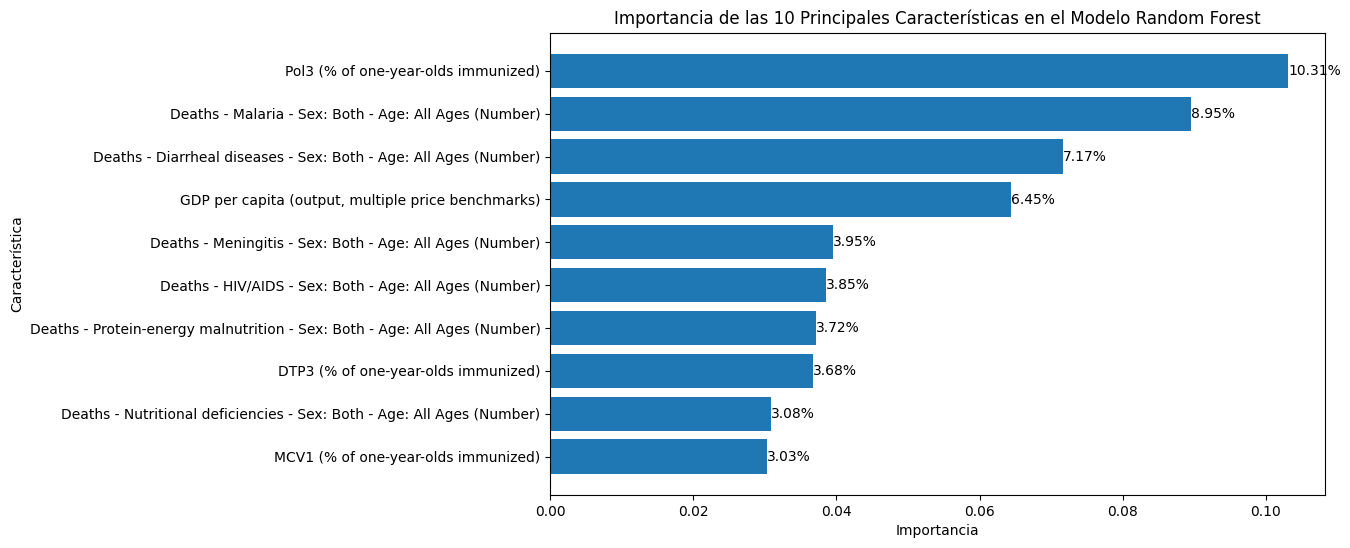

In [165]:
# Suma total de las importancias
total_importance = importance_df['importance'].sum()

# Filtrar los 10 primeros features
top_10_features = importance_df.head(10)

# Calcular los porcentajes de los 10 primeros features respecto al total
top_10_features['percentage'] = (top_10_features['importance'] / total_importance) * 100

# Crear el gráfico de barras horizontales para las 10 principales características
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_features['feature'], top_10_features['importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las 10 Principales Características en el Modelo Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior

# Añadir los porcentajes a cada barra
for bar, percentage in zip(bars, top_10_features['percentage']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{percentage:.2f}%', va='center')

# Mostrar el gráfico
plt.show()

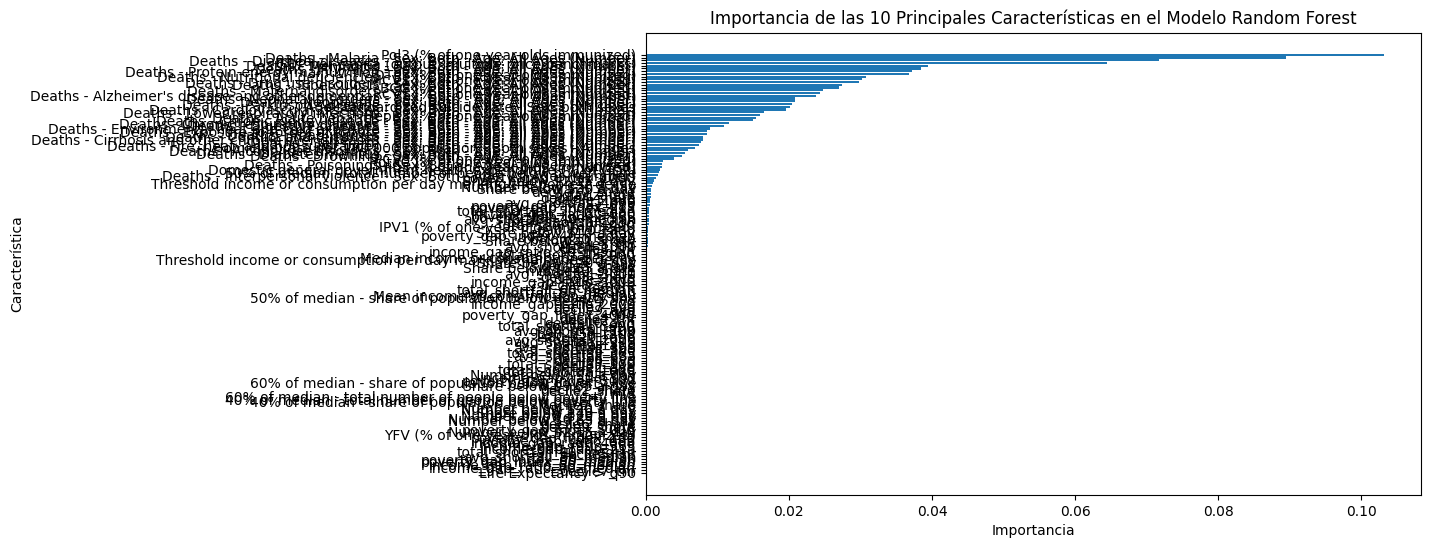

In [166]:
# Crear el gráfico de barras horizontales para la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las 10 Principales Características en el Modelo Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
plt.show()